# Ch08 ARIMA 모형의 적합

In [2]:
options(repr.plot.width = 12, repr.plot.height = 6)

# EX 8.6 가스공급비율

In [4]:
z <- scan("gas.txt", what=list(0,0))

In [6]:
head(z)

[[1]]
  [1] -0.109  0.000  0.178  0.339  0.373  0.441  0.461  0.348  0.127 -0.180
 [11] -0.588 -1.055 -1.421 -1.520 -1.302 -0.814 -0.475 -0.193  0.088  0.435
 [21]  0.771  0.866  0.875  0.891  0.987  1.263  1.775  1.976  1.934  1.866
 [31]  1.832  1.767  1.608  1.265  0.790  0.360  0.115  0.088  0.331  0.645
 [41]  0.960  1.409  2.670  2.834  2.812  2.483  1.929  1.485  1.214  1.239
 [51]  1.608  1.905  2.023  1.815  0.535  0.122  0.009  0.164  0.671  1.019
 [61]  1.146  1.155  1.112  1.121  1.223  1.257  1.157  0.913  0.620  0.255
 [71] -0.280 -1.080 -1.551 -1.799 -1.825 -1.456 -0.944 -0.570 -0.431 -0.577
 [81] -0.960 -1.616 -1.875 -1.891 -1.746 -1.474 -1.201 -0.927 -0.524  0.040
 [91]  0.788  0.943  0.930  1.006  1.137  1.198  1.054  0.595 -0.080 -0.314
[101] -0.288 -0.153 -0.109 -0.187 -0.255 -0.229 -0.007  0.254  0.330  0.102
[111] -0.423 -1.139 -2.275 -2.594 -2.716 -2.510 -1.790 -1.346 -1.081 -0.910
[121] -0.876 -0.885 -0.800 -0.544 -0.416 -0.271  0.000  0.403  0.841  1.285
[131]  1.607  1.746  1.683  1.485  0.993  0.648  0.577  0.577  0.632  0.747
[141]  0.900  0.993  0.968  0.790  0.399 -0.161 -0.553 -0.603 -0.424 -0.194
[151] -0.049  0.060  0.161  0.301  0.517  0.566  0.560  0.573  0.592  0.671
[161]  0.933  1.337  1.460  1.353  0.772  0.218 -0.237 -0.714 -1.099 -1.269
[171] -1.175 -0.676  0.033  0.556  0.643  0.484  0.109 -0.310 -0.697 -1.047
[181] -1.218 -1.183 -0.873 -0.336  0.063  0.084  0.000  0.001  0.209  0.556
[191]  0.782  0.858  0.918  0.862  0.416 -0.336 -0.959 -1.813 -2.378 -2.499
[201] -2.473 -2.330 -2.053 -1.739 -1.261 -0.569 -0.137 -0.024 -0.050 -0.135
[211] -0.276 -0.534 -0.871 -1.243 -1.439 -1.422 -1.175 -0.813 -0.634 -0.582
[221] -0.625 -0.713 -0.848 -1.039 -1.346 -1.628 -1.619 -1.149 -0.488 -0.160
[231] -0.007 -0.092 -0.620 -1.086 -1.525 -1.858 -2.029 -2.024 -1.961 -1.952
[241] -1.794 -1.302 -1.030 -0.918 -0.798 -0.867 -1.047 -1.123 -0.876 -0.395
[251]  0.185  0.662  0.709  0.605  0.501  0.603  0.943  1.223  1.249  0.824
[261]  0.102  0.025  0.382  0.922  1.032  0.866  0.527  0.093 -0.458 -0.748
[271] -0.947 -1.029 -0.928 -0.645 -0.424 -0.276 -0.158 -0.033  0.102  0.251
[281]  0.280  0.000 -0.493 -0.759 -0.824 -0.740 -0.528 -0.204  0.034  0.204
[291]  0.253  0.195  0.131  0.017 -0.182 -0.262

[[2]]
  [1] 53.8 53.6 53.5 53.5 53.4 53.1 52.7 52.4 52.2 52.0 52.0 52.4 53.0 54.0 54.9
 [16] 56.0 56.8 56.8 56.4 55.7 55.0 54.3 53.2 52.3 51.6 51.2 50.8 50.5 50.0 49.2
 [31] 48.4 47.9 47.6 47.5 47.5 47.6 48.1 49.0 50.0 51.1 51.8 51.9 51.7 51.2 50.0
 [46] 48.3 47.0 45.8 45.6 46.0 46.9 47.8 48.2 48.3 47.9 47.2 47.2 48.1 49.4 50.6
 [61] 51.5 51.6 51.2 50.5 50.1 49.8 49.6 49.4 49.3 49.2 49.3 49.7 50.3 51.3 52.8
 [76] 54.4 56.0 56.9 57.5 57.3 56.6 56.0 55.4 55.4 56.4 57.2 58.0 58.4 58.4 58.1
 [91] 57.7 57.0 56.0 54.7 53.2 52.1 51.6 51.0 50.5 50.4 51.0 51.8 52.4 53.0 53.4
[106] 53.6 53.7 53.8 53.8 53.8 53.3 53.0 52.9 53.4 54.6 56.4 58.0 59.4 60.2 60.0
[121] 59.4 58.4 57.6 56.9 56.4 56.0 55.7 55.3 55.0 54.4 53.7 52.8 51.6 50.6 49.4
[136] 48.8 48.5 48.7 49.2 49.8 50.4 50.7 50.9 50.7 50.5 50.4 50.2 50.4 51.2 52.3
[151] 53.2 53.9 54.1 54.0 53.6 53.2 53.0 52.8 52.3 51.9 51.6 51.6 51.4 51.2 50.7
[166] 50.0 49.4 49.3 49.7 50.6 51.8 53.0 54.0 55.3 55.9 55.9 54.6 53.5 52.4 52.1
[181] 52.3 53.0 53.8 54.6 55.4 55.9 55.9 55.2 54.4 53.7 53.6 53.6 53.2 52.5 52.0
[196] 51.4 51.0 50.9 52.4 53.5 55.6 58.0 59.5 60.0 60.4 60.5 60.2 59.7 59.0 57.6
[211] 56.4 55.2 54.5 54.1 54.1 54.4 55.5 56.2 57.0 57.3 57.4 57.0 56.4 55.9 55.5
[226] 55.3 55.2 55.4 56.0 56.5 57.1 57.3 56.8 55.6 55.0 54.1 54.3 55.3 56.4 57.2
[241] 57.8 58.3 58.6 58.8 58.8 58.6 58.0 57.4 57.0 56.4 56.3 56.4 56.4 56.0 55.2
[256] 54.0 53.0 52.0 51.6 51.6 51.1 50.4 50.0 50.0 52.0 54.0 55.1 54.5 52.8 51.4
[271] 50.8 51.2 52.0 52.8 53.8 54.5 54.9 54.9 54.8 54.4 53.7 53.3 52.8 52.6 52.6
[286] 53.0 54.3 56.0 57.0 58.0 58.6 58.5 58.3 57.8 57.3 57.0

1번째는 가스 2번째는 이산화탄소

In [5]:
dt <- data.frame( t = 1:length(z[[1]]),
 rate = z[[1]],
 co2 = z[[2]])
head(dt)

,t,rate,co2
,<int>,<dbl>,<dbl>
1,1,-0.109,53.8
2,2,0.000,53.6
3,3,0.178,53.5
4,4,0.339,53.5
5,5,0.373,53.4
6,6,0.441,53.1


`-` 시도표와 ACF/PACF 그림 그리기

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



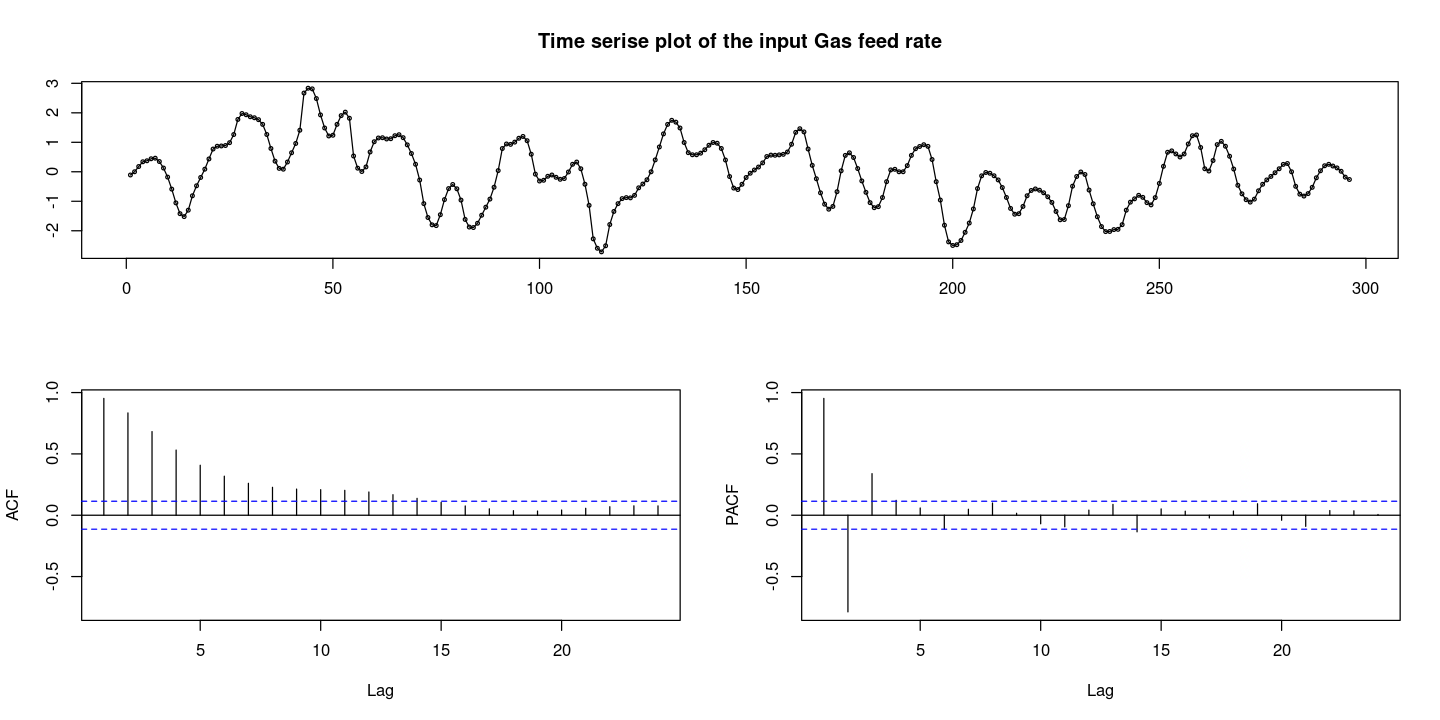

In [7]:
forecast::tsdisplay(dt$rate,
 main = 'Time serise plot of the input Gas feed rate',
 lag.max=24)


- 0을 기준으로 대칭인 것 처럼 보이고 등분산도 만족해 보인다. ---> 정상시계열 같다.

- 결정적 추세는 없다.

- ACF를 보면 확률적 추세가 있다면 천천히 감소하지만, 이건 지수적으로 감소하는 느낌이니까 확률적 추세가 있다고 하기엔 애매한 그림이다. 좀이따가 단위근 검정을 해보자.

- PACF를 보면 3개만 살아있고 다 절단이다. 

- AR(3)모형이 적합해 보인다.

In [9]:
#모형 적합도 검정 : H0 : rho1=...=rho_k=0 : 포투맨트검정 : rate 가 백색잡음 과정인가?
Box.test(dt$rate, lag=1, type = "Ljung-Box")
Box.test(dt$rate, lag=6, type = "Ljung-Box") #rho1=rho2=...=rho6=0
Box.test(dt$rate, lag=12, type = "Ljung-Box") #rho1=...=rho12=0


	Box-Ljung test

data:  dt$rate
X-squared = 271.26, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  dt$rate
X-squared = 786.35, df = 6, p-value < 2.2e-16



	Box-Ljung test

data:  dt$rate
X-squared = 874.07, df = 12, p-value < 2.2e-16


- H0를 기각하지 못하면 WN이다.

- H0를 기각하면 WH가 아니니가 모형 적합을 해야한다.

- H0를 다 기각함. 모두 다 0인건 아님. WN아니야!

`-` 단위근 검정

In [14]:
### random walk process 에서의 단위근 검정
z <- rnorm(100) #WN
cz <- cumsum(z) #random walk


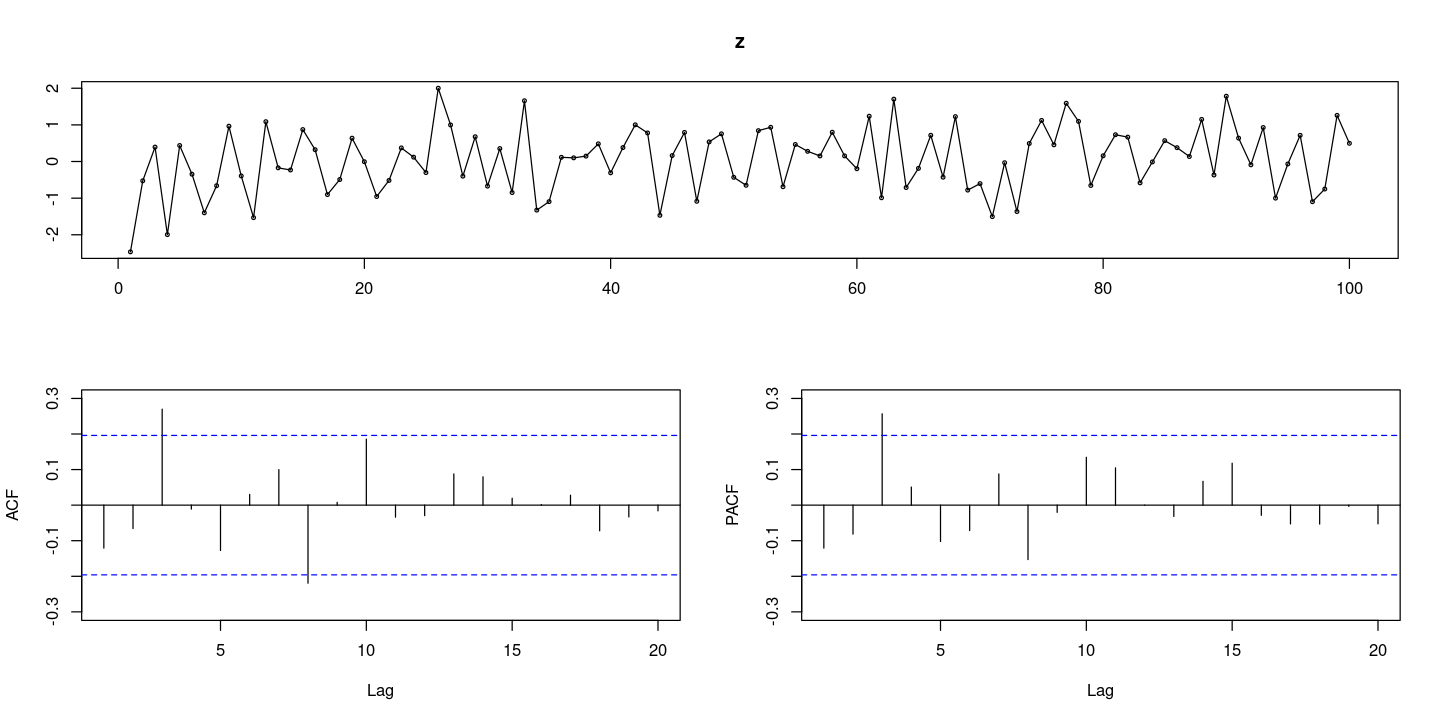

In [15]:
forecast::tsdisplay(z)

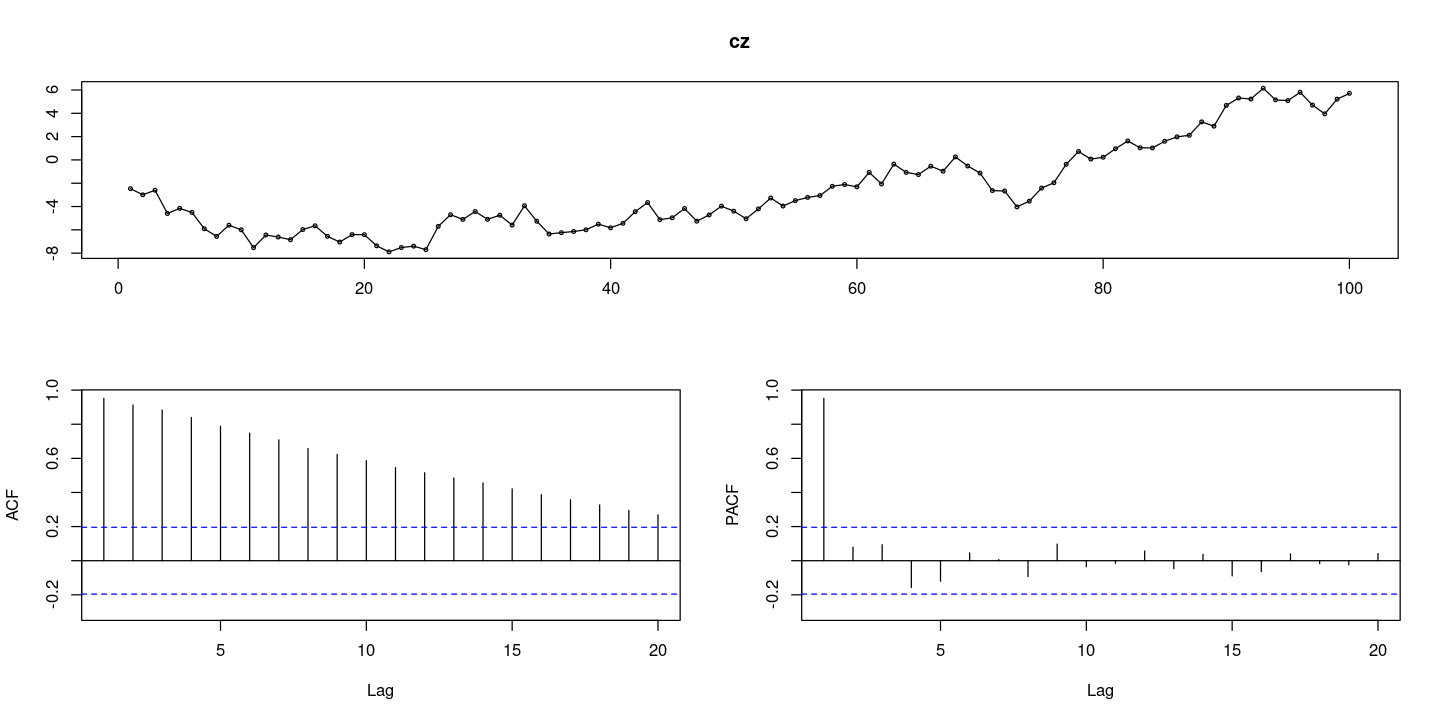

In [16]:
forecast::tsdisplay(cz)


- ACF그래프가 천천히 감소한다.

In [24]:
fUnitRoots::adfTest(z, lags = 1, type = "nc")
#H0 : phi=1 단위근이 있다 , 차분이 필요하다. :(1-phi*B)Zt = et
#H1 : |rho|<1 단위근이 없다. 차분이 필요하지 않다.


Warning message in fUnitRoots::adfTest(z, lags = 1, type = "nc"):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -8.2198
  P VALUE:
    0.01 

Description:
 Tue Nov 28 22:16:00 2023 by user: 

- lags = 1 : 단위근이 1개 있는 거 보자

- type: 'nc', 'c', 'ct' 3개가 있음

- type = 'nc' : 가지고 있는 데이터가 평균이 0이면 이 옵션 사용 

- type = 'c' : 가지고 있는 데이터가 평균이 0이 아니면 이 옵션 사용 (상수항이 있는)

- type = 'ct' : 결정적 추세가 있어 보이면 이 옵션 사용 (ㅅ상수항과 기울기가 있는)

- WN이니까 차분이 필요하면 안되겠지? ---> pvalue값이 작아. 기각 ㄱㄱ

In [25]:
fUnitRoots::adfTest(cz, lags = 0, type = "nc") #H0 : phi=1
fUnitRoots::adfTest(cz, lags = 1, type = "nc") #H0 : phi=1
fUnitRoots::adfTest(cz, lags = 2, type = "nc") #H0 : phi=1
#H0 : phi=1 단위근이 있다 , 차분이 필요하다. :(1-phi*B)Zt = et
#H1 : |rho|<1 단위근이 없다. 차분이 필요하지 않다.



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -0.5717
  P VALUE:
    0.4309 

Description:
 Tue Nov 28 22:19:33 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.4404
  P VALUE:
    0.4728 

Description:
 Tue Nov 28 22:19:33 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -0.3474
  P VALUE:
    0.5024 

Description:
 Tue Nov 28 22:19:33 2023 by user: 

- pvalue가 애매하게 되었따. 0.05로 주면 기각할 수 있지만 0.01이면 기각 못함..

In [26]:
## 단위근 검정 H0 : 단위근이 있다.
## 상수항, 추세 (nc, c, ct)
fUnitRoots::adfTest(dt$rate, lags = 1, type = "nc")


Warning message in fUnitRoots::adfTest(dt$rate, lags = 1, type = "nc"):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -7.6608
  P VALUE:
    0.01 

Description:
 Tue Nov 28 22:21:39 2023 by user: 

- 기각을 해버리자 ---> 단위근 없다 ---> 차분 필요 없다.

`-` 평균 포함

In [27]:
## 평균 포함
mean(dt$rate)

[1] -0.05683446

- 거의 0에 가깝다.

In [28]:
t.test(dt$rate) # H0 : mu=0


	One Sample t-test

data:  dt$rate
t = -0.91149, df = 295, p-value = 0.3628
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.17954799  0.06587907
sample estimates:
  mean of x 
-0.05683446 


- pvalue가 0.3이 되서 H0를 기각 못한다. 즉 mu=0이다.

`-` arima

In [32]:
# ?arima

- `include.mean = TRUE` : default가 true이다.

- `fixed` = AR()모형으로 픽스할래 ! 이런식으로 할 때

- `init` = 초기값 설정


`-` 모형 적합 : AR(3)

$X_t = a_1X_{t−1} + ⋯ + a_pX_{t−p} + e_t + b_1e_{t−1} + ⋯ + b_qe_{t−q}$ : e앞에 부호 조심!

In [29]:
## 모형 적합
fit1 <- arima(dt$rate, order=c(3,0,0)) #method = c("CSS-ML", "ML", "CSS")
#default method: to use CLSE to find starting values, then ML
fit1
# intercept = mu



Call:
arima(x = dt$rate, order = c(3, 0, 0))

Coefficients:
         ar1      ar2     ar3  intercept
      1.9691  -1.3651  0.3394    -0.0606
s.e.  0.0544   0.0985  0.0543     0.1898

sigma^2 estimated as 0.0353:  log likelihood = 72.57,  aic = -135.14

In [35]:
summary(fit1)



Call:
arima(x = dt$rate, order = c(3, 0, 0))

Coefficients:
         ar1      ar2     ar3  intercept
      1.9691  -1.3651  0.3394    -0.0606
s.e.  0.0544   0.0985  0.0543     0.1898

sigma^2 estimated as 0.0353:  log likelihood = 72.57,  aic = -135.14

Training set error measures:
                       ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set 3.004966e-05 0.1878719 0.1307624 NaN  Inf 0.5140648 -0.03522643

`-` 통계적 유의성 확인하려고 할 때: coeftest

In [36]:
lmtest::coeftest(fit1)


z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ar1        1.969066   0.054385  36.2061 < 2.2e-16 ***
ar2       -1.365143   0.098538 -13.8540 < 2.2e-16 ***
ar3        0.339404   0.054328   6.2473 4.177e-10 ***
intercept -0.060643   0.189800  -0.3195    0.7493    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- ph1, ph2, ph3는 다 유의하다. intercept(평균)은 별로 유이하지 않아.

In [38]:
fit2 <- arima(dt$rate, order=c(3,0,0), include.mean = F) # 위에서 평균은 유의하지 않았으므로 평균 빼고 다시 적합
summary(fit2)


Call:
arima(x = dt$rate, order = c(3, 0, 0), include.mean = F)

Coefficients:
         ar1      ar2     ar3
      1.9696  -1.3659  0.3399
s.e.  0.0544   0.0985  0.0543

sigma^2 estimated as 0.03531:  log likelihood = 72.52,  aic = -137.04

Training set error measures:
                       ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set -0.003418121 0.1879034 0.1305995 NaN  Inf 0.5134245 -0.03583041

- AIC가 감소했으므로 mean을 뺀게 더 유의한 모형

In [39]:
lmtest::coeftest(fit2)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1  1.969560   0.054371  36.2243 < 2.2e-16 ***
ar2 -1.365925   0.098522 -13.8641 < 2.2e-16 ***
ar3  0.339906   0.054314   6.2582 3.894e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [40]:
ls(fit1)

[1] "aic"       "arma"      "call"      "code"      "coef"      "loglik"   
 [7] "mask"      "model"     "n.cond"    "nobs"      "residuals" "series"   
[13] "sigma2"    "var.coef"

In [41]:
fit1$aic
fit2$aic

[1] -135.1378

[1] -137.0357

In [42]:
fit2$sigma2 # 오차의 분산에 대한 추정량


[1] 0.03530768

`-` 잠정모형 : AR(3)

$Z_t = 1.97Z_{t−1} − 1.37Z_{t−2} + 0.34Z_{t−3} + ε_t$

$\hatσ^2 = 0.0353$


`-` 잔차분석

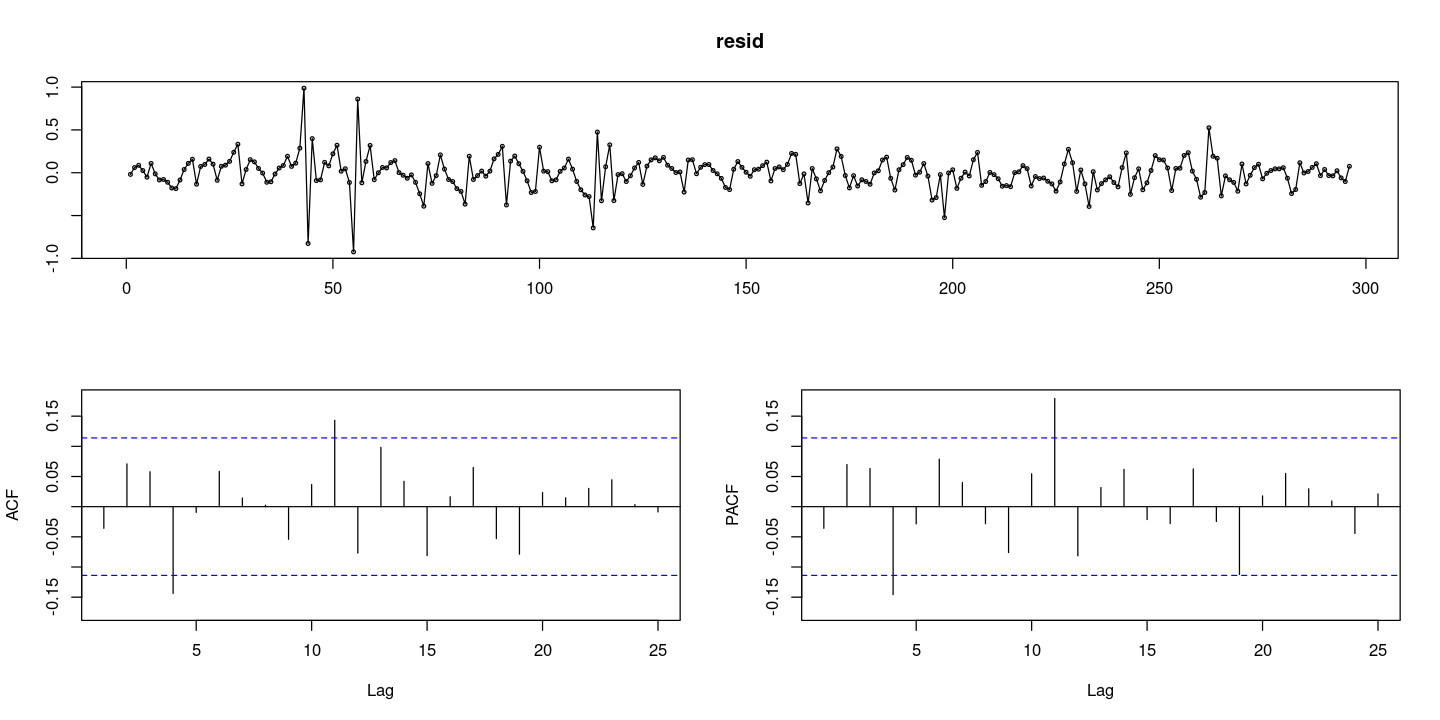

In [44]:
resid = resid(fit2)
forecast::tsdisplay(resid)


`-` 잔차의 정규성 검정

In [45]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: normal distribution


	Jarque Bera Test

data:  resid
X-squared = 496.68, df = 2, p-value < 2.2e-16


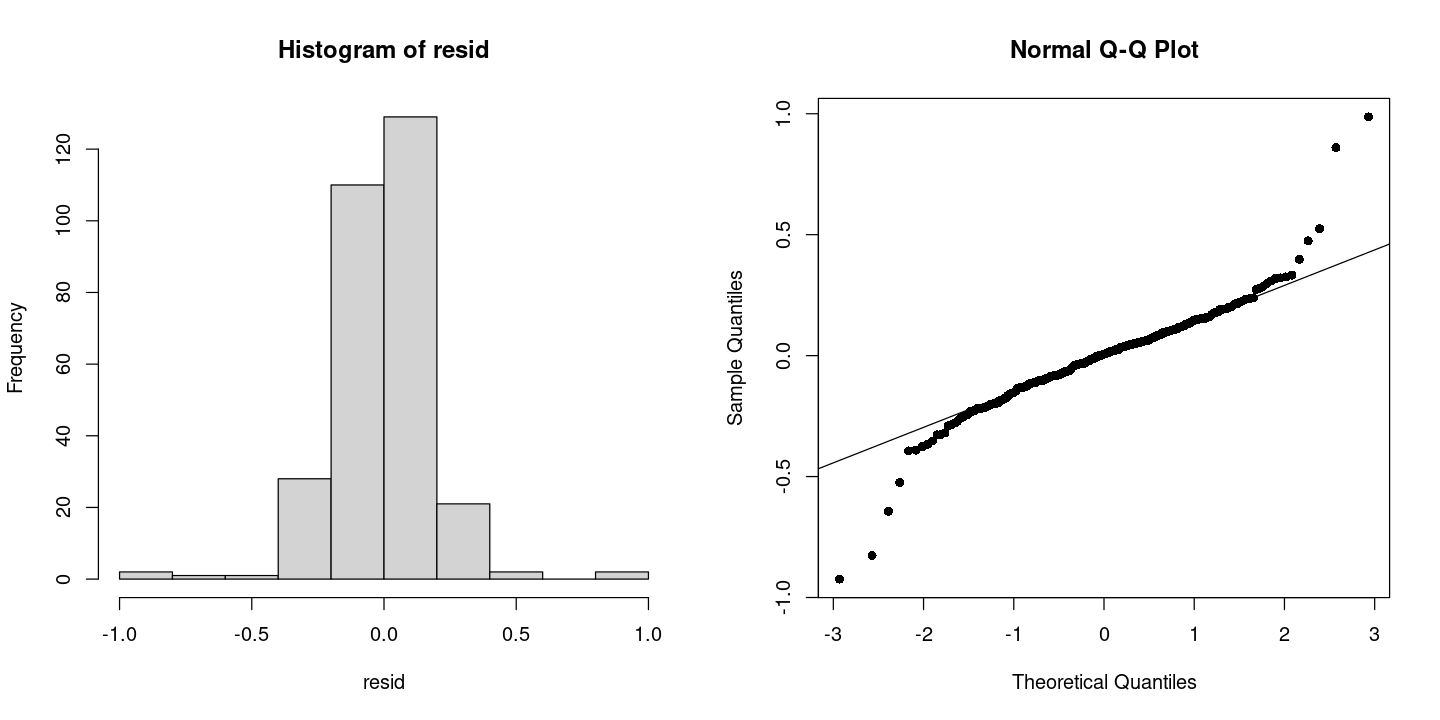

In [46]:
par(mfrow=c(1,2))
hist(resid)
qqnorm(resid, pch=16)
qqline(resid)

- 꼬리가 엄청 두껍다. 정규분포 ㄴㄴ같은데? 근데 책에서는 몇개 튀어나온 5개 점 때문에 그런거니까 그거 빼곤 정규분포 같아~ 라구 하기도 한다.

In [53]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit2, lags=c(6,12,18,24))


,lags,statistic,df,p-value
,6,10.21058,3,0.01685835
,12,19.76879,9,0.01939412
,18,27.70650,15,0.02348012
,24,30.86553,21,0.07592519


- 6번째깢/ 12번째까지/ 18번쨰까지/ 24번쨰까지 싹 다 0인지 보여줘!

- 이상점 때문에 pvalue값이 애매하게 나옴

initial  value 0.073551 
iter   2 value -0.073322
iter   3 value -0.178255
iter   4 value -0.376823
iter   5 value -0.612419
iter   6 value -0.918313
iter   7 value -1.297243
iter   8 value -1.540430
iter   9 value -1.547244
iter  10 value -1.619914
iter  11 value -1.629287
iter  12 value -1.632509
iter  13 value -1.632906
iter  14 value -1.633608
iter  15 value -1.635745
iter  16 value -1.637069
iter  17 value -1.637183
iter  18 value -1.637941
iter  19 value -1.638469
iter  20 value -1.639157
iter  21 value -1.645795
iter  22 value -1.654637
iter  23 value -1.659278
iter  24 value -1.667888
iter  25 value -1.672991
iter  26 value -1.674756
iter  27 value -1.675067
iter  28 value -1.675120
iter  29 value -1.675335
iter  30 value -1.675343
iter  31 value -1.675347
iter  32 value -1.675363
iter  33 value -1.675371
iter  34 value -1.675374
iter  35 value -1.675374
iter  35 value -1.675374
iter  35 value -1.675374
final  value -1.675374 
converged
initial  value -1.671802 
iter   2 value 

$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1      ar2     ar3      ma1    xmean
      2.2497  -1.8431  0.5607  -0.3203  -0.0593
s.e.  0.1158   0.1954  0.0909   0.1344   0.2202

sigma^2 estimated as 0.03475:  log likelihood = 74.86,  aic = -137.72

$degrees_of_freedom
[1] 291

$ttable
      Estimate     SE t.value p.value
ar1     2.2497 0.1158 19.4217  0.0000
ar2    -1.8431 0.1954 -9.4338  0.0000
ar3     0.5607 0.0909  6.1657  0.0000
ma1    -0.3203 0.1344 -2.3830  0.0178
xmean  -0.0593 0.2202 -0.2694  0.7878

$AIC
[1] -0.4652596

$AICc
[1] -0.4645607

$BIC
[1] -0.390455


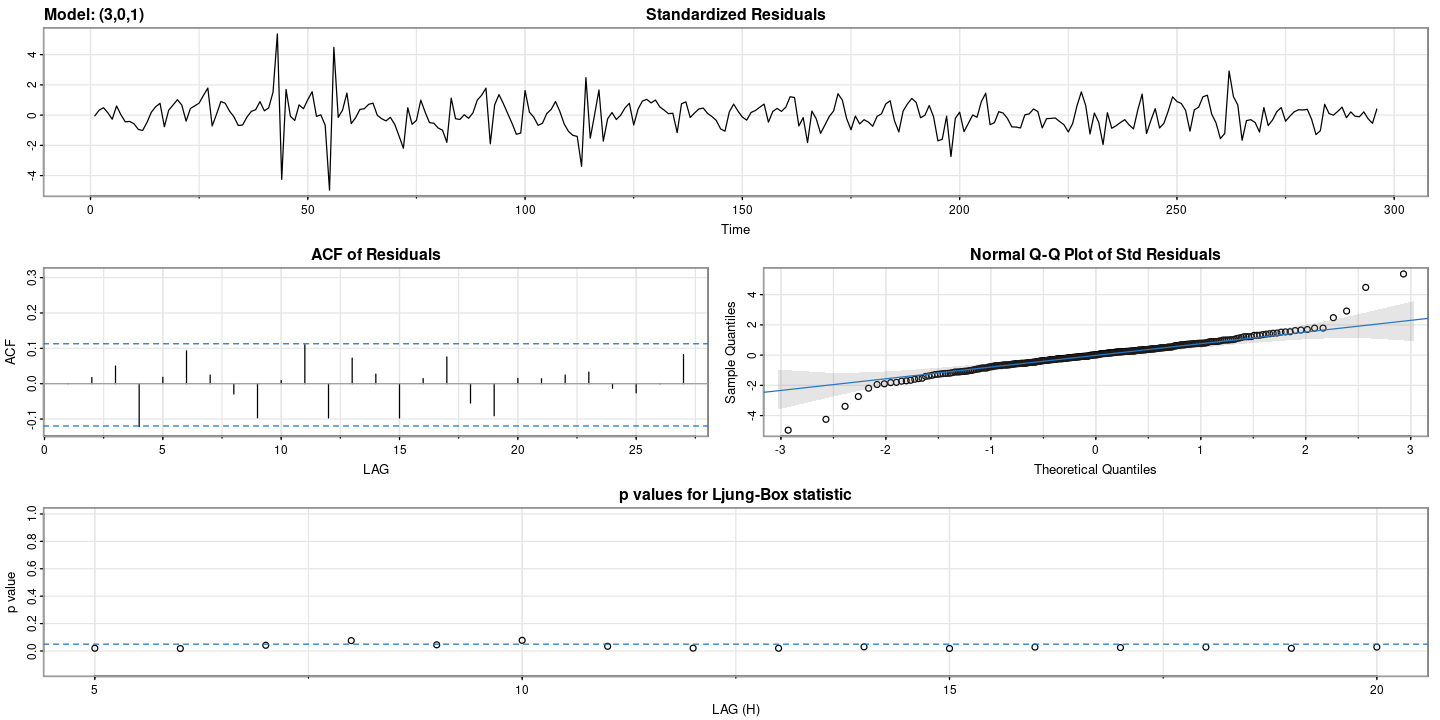

In [56]:
## 잔차 검정
astsa::sarima(dt$rate, p=3, d=0, q=1)


In [57]:
astsa::sarima(dt$rate, p=3, d=0, q=1, details=F)

$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1      ar2     ar3      ma1    xmean
      2.2497  -1.8431  0.5607  -0.3203  -0.0593
s.e.  0.1158   0.1954  0.0909   0.1344   0.2202

sigma^2 estimated as 0.03475:  log likelihood = 74.86,  aic = -137.72

$degrees_of_freedom
[1] 291

$ttable
      Estimate     SE t.value p.value
ar1     2.2497 0.1158 19.4217  0.0000
ar2    -1.8431 0.1954 -9.4338  0.0000
ar3     0.5607 0.0909  6.1657  0.0000
ma1    -0.3203 0.1344 -2.3830  0.0178
xmean  -0.0593 0.2202 -0.2694  0.7878

$AIC
[1] -0.4652596

$AICc
[1] -0.4645607

$BIC
[1] -0.390455


$pred
Time Series:
Start = 297 
End = 308 
Frequency = 1 
 [1] -0.26510614 -0.22955238 -0.18245672 -0.13931247 -0.10658382 -0.08505255
 [7] -0.07269199 -0.06663826 -0.06428419 -0.06371784 -0.06376165 -0.06382208

$se
Time Series:
Start = 297 
End = 308 
Frequency = 1 
 [1] 0.1878719 0.4149044 0.6283958 0.7956610 0.9103261 0.9807042 1.0199474
 [8] 1.0401144 1.0498515 1.0543918 1.0565120 1.0575442

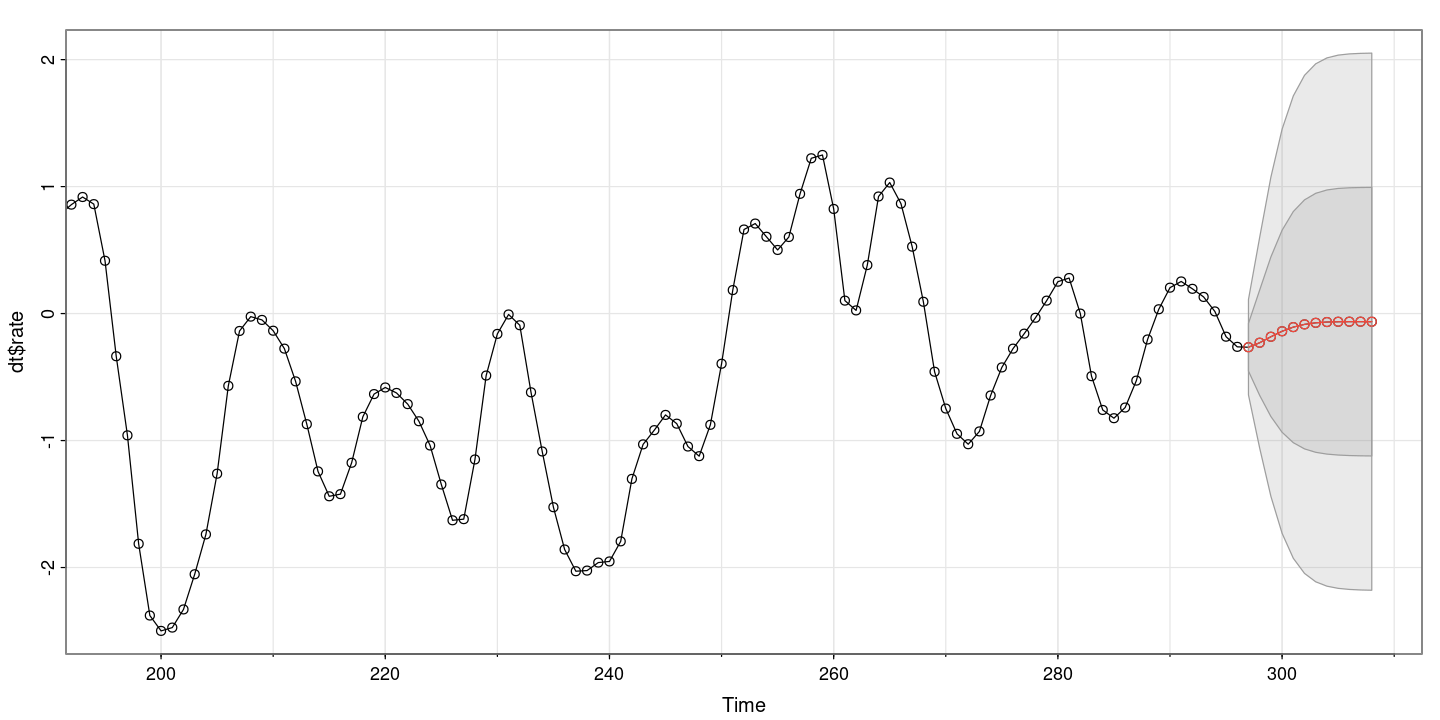

In [59]:
# 12시차 앞에 것을 예측해줘!!!
astsa::sarima.for(dt$rate, n.ahead=12, p=3, d=0, q=0)

- 신뢰구간 까지 구해준다. 신기하군..

`-` 과대적합을 해 볼 수도 있음 : AR(4), AR(3,1)


In [60]:
fit2 <- arima(dt$rate, order=c(3,0,0)) #AR(3)
fit3 <- arima(dt$rate, order=c(4,0,0)) #AR(4)
fit4 <- arima(dt$rate, order=c(3,0,1)) #ARMA(3,1)
fit5 <- arima(dt$rate, order=c(4,0,1)) #ARMA(4,1)


In [61]:
lmtest::coeftest(fit2)
lmtest::coeftest(fit3)
lmtest::coeftest(fit4)
lmtest::coeftest(fit5)


z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ar1        1.969066   0.054385  36.2061 < 2.2e-16 ***
ar2       -1.365143   0.098538 -13.8540 < 2.2e-16 ***
ar3        0.339404   0.054328   6.2473 4.177e-10 ***
intercept -0.060643   0.189800  -0.3195    0.7493    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

           Estimate Std. Error z value Pr(>|z|)    
ar1        1.927075   0.057476 33.5284  < 2e-16 ***
ar2       -1.197232   0.125870 -9.5116  < 2e-16 ***
ar3        0.098632   0.125831  0.7838  0.43313    
ar4        0.121539   0.057377  2.1183  0.03415 *  
intercept -0.059332   0.212340 -0.2794  0.77992    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        2.249705   0.115834 19.4217 < 2.2e-16 ***
ar2       -1.843111   0.195373 -9.4338 < 2.2e-16 ***
ar3        0.560735   0.090945  6.1657 7.019e-10 ***
ma1       -0.320319   0.134416 -2.3830   0.01717 *  
intercept -0.059321   0.220225 -0.2694   0.78765    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        2.095578   0.310005  6.7598 1.382e-11 ***
ar2       -1.527029   0.618747 -2.4679   0.01359 *  
ar3        0.324392   0.445860  0.7276   0.46688    
ar4        0.066838   0.123362  0.5418   0.58795    
ma1       -0.172334   0.307391 -0.5606   0.57505    
intercept -0.057957   0.217926 -0.2659   0.79028    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- AR(4)와 AR(3)을 비교해 보면, AR(4)에서는 ar4가 유의하긴 하지만.. *한개라서 선택안하는게 나을 듯 하다.

- ARMA(3,0,1)도 그닥

- ARMA(4,0,1) 공통인수가 생겨서 더 이상해졌다.

In [62]:
paste0("AIC for AR(3) = ", fit2$aic)
paste0("AIC for AR(4) = ", fit3$aic)
paste0("AIC for ARMA(3,1) = ", fit4$aic)
paste0("AIC for ARMA(4,1) = ", fit5$aic)

[1] "AIC for AR(3) = -135.137805258848"

[1] "AIC for AR(4) = -137.587994248135"

[1] "AIC for ARMA(3,1) = -137.71684916351"

[1] "AIC for ARMA(4,1) = -135.941477951932"

`-` auto.aroma

- 자동으로 좋은거 찾아줘

In [63]:
forecast::auto.arima(dt$rate, ic='bic', test="adf", trace = T)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -108.9179
 ARIMA(0,0,0) with non-zero mean : 891.9727
 ARIMA(1,0,0) with non-zero mean : 194.5692
 ARIMA(0,0,1) with non-zero mean : 520.7498
 ARIMA(0,0,0) with zero mean     : 887.1148
 ARIMA(1,0,2) with non-zero mean : -68.83754
 ARIMA(2,0,1) with non-zero mean : -109.6656
 ARIMA(1,0,1) with non-zero mean : -11.98193
 ARIMA(2,0,0) with non-zero mean : -88.26513
 ARIMA(3,0,1) with non-zero mean : -117.6677
 ARIMA(3,0,0) with non-zero mean : -118.7078
 ARIMA(4,0,0) with non-zero mean : -116.5382
 ARIMA(4,0,1) with non-zero mean : -111.1943
 ARIMA(3,0,0) with zero mean     : -124.2755
 ARIMA(2,0,0) with zero mean     : -93.73805
 ARIMA(4,0,0) with zero mean     : -122.1245
 ARIMA(3,0,1) with zero mean     : -123.2595
 ARIMA(2,0,1) with zero mean     : -115.215
 ARIMA(4,0,1) with zero mean     : -116.7881

 Now re-fitting the best model(s) without approximations...

 ARIMA(3,0,0) with zero mea

Series: dt$rate 
ARIMA(3,0,0) with zero mean 

Coefficients:
         ar1      ar2     ar3
      1.9696  -1.3659  0.3399
s.e.  0.0544   0.0985  0.0543

sigma^2 = 0.03567:  log likelihood = 72.52
AIC=-137.04   AICc=-136.9   BIC=-122.27

In [64]:
fit2$sigma2

[1] 0.03529587

# EX 8.7 모의 실험 데이터


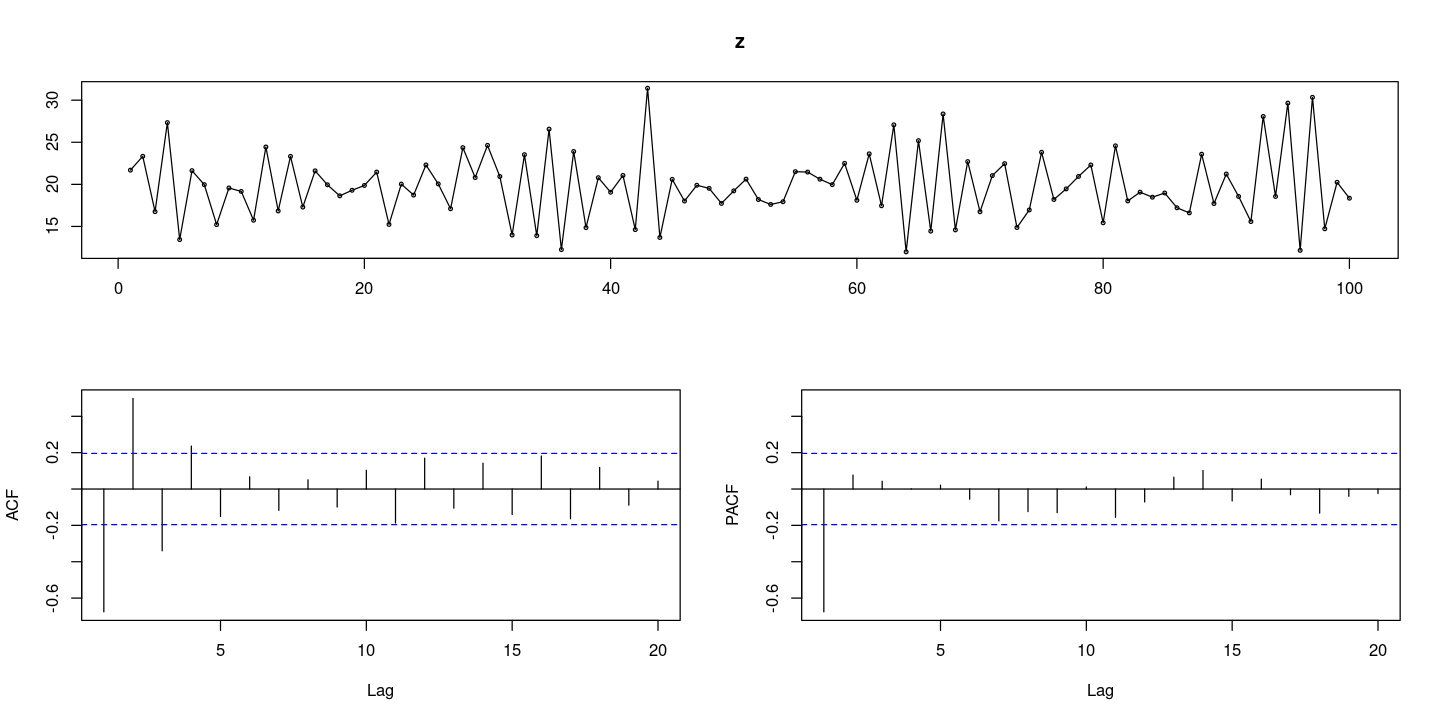

In [66]:
z <- scan("eg8_7.txt")
forecast::tsdisplay(z)

- 평균이 20정도 이고 추세나 계절성분이 보이지 않는 정상 시계열

- acf는 사인 함수 형태를 그리며 지수적으로 감소하는 형태

- pacf는 처음만 ㅏㅅㄹ아남고 나머지는 다 0인 AR(1)모형

In [67]:
#모형 적합도 검정 : H0 : rho1=...=rho_k=0 WN
Box.test(z, lag=1, type = "Ljung-Box")
Box.test(z, lag=6, type = "Ljung-Box")
Box.test(z, lag=12, type = "Ljung-Box")


	Box-Ljung test

data:  z
X-squared = 47.058, df = 1, p-value = 6.892e-12



	Box-Ljung test

data:  z
X-squared = 93.925, df = 6, p-value < 2.2e-16



	Box-Ljung test

data:  z
X-squared = 105.37, df = 12, p-value < 2.2e-16


- 모든 시차에서 다 기각을 한다.

- WN가 아니다.

In [68]:
## 단위근 검정 H0 : 단위근이 있다.
fUnitRoots::adfTest(z, lags = 0, type = "c")
fUnitRoots::adfTest(z, lags = 1, type = "c")
fUnitRoots::adfTest(z, lags = 2, type = "c")

Warning message in fUnitRoots::adfTest(z, lags = 0, type = "c"):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -22.4468
  P VALUE:
    0.01 

Description:
 Tue Nov 28 22:50:24 2023 by user: 

Warning message in fUnitRoots::adfTest(z, lags = 1, type = "c"):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -8.4607
  P VALUE:
    0.01 

Description:
 Tue Nov 28 22:50:24 2023 by user: 

Warning message in fUnitRoots::adfTest(z, lags = 2, type = "c"):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -5.98
  P VALUE:
    0.01 

Description:
 Tue Nov 28 22:50:24 2023 by user: 

- 다 기각! 단위근이 없다. 차분을 할 필요가 없다.!!

In [69]:
## 모형적합 AR(1)
fit <- arima(z,order=c(1,0,0))
summary(fit)



Call:
arima(x = z, order = c(1, 0, 0))

Coefficients:
          ar1  intercept
      -0.6715    19.8312
s.e.   0.0728     0.1776

sigma^2 estimated as 8.744:  log likelihood = -250.61,  aic = 507.22

Training set error measures:
                      ME     RMSE      MAE       MPE    MAPE      MASE
Training set 0.007670341 2.957007 2.337302 -2.080783 11.9899 0.4096807
                   ACF1
Training set 0.04344908

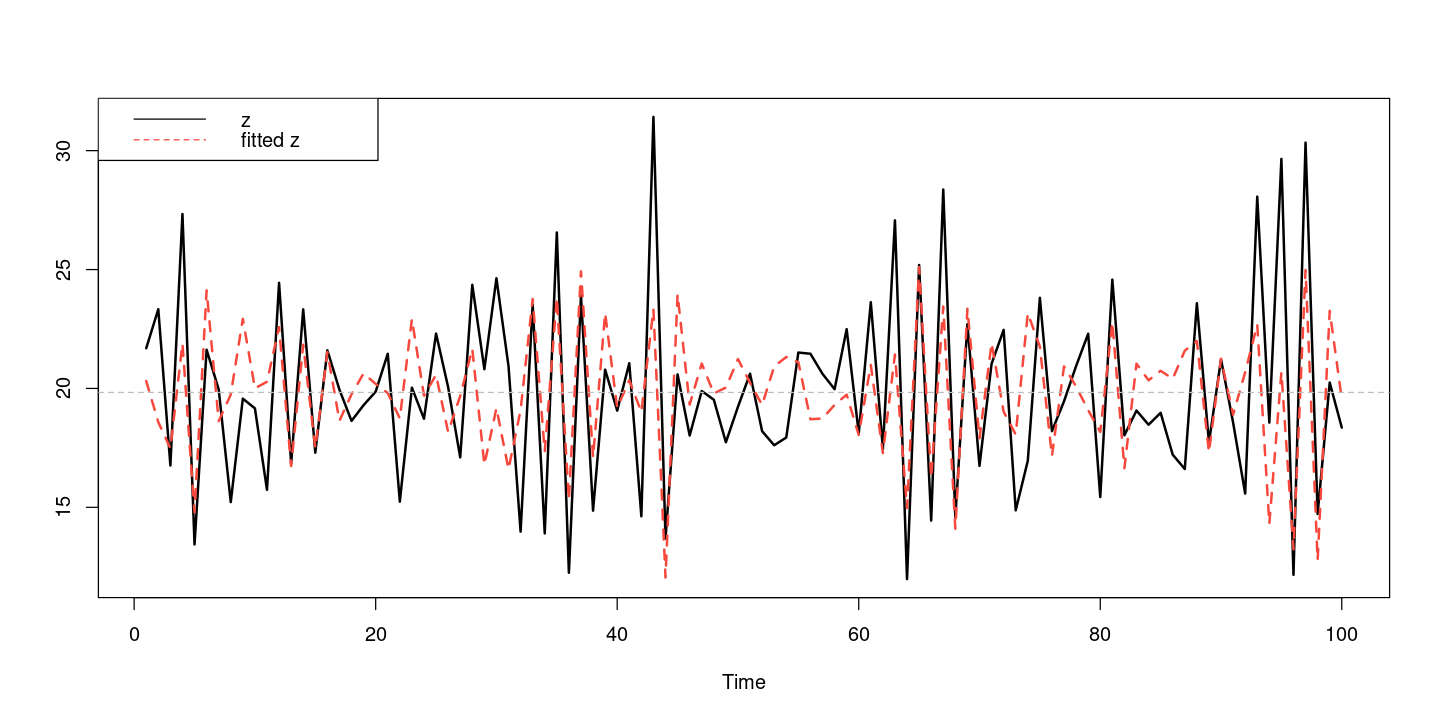

In [70]:
ts.plot(z, fitted(fit), col=1:2, lty=1:2, lwd=2)
abline(h=mean(z), col="grey", lty=2)
legend("topleft", c("z", "fitted z"), col=1:2, lty=1:2)

In [71]:
sum((z - fitted(fit))^2) #SSE
sum((z - fitted(fit))^2) / 100 #MSE
sqrt(sum((z - fitted(fit))^2) / 100) #RMSE
sum(abs(z-fitted(fit))/100) #MAE
sum(abs(z-fitted(fit))/z)*100/100 #MAPE

[1] 874.3891

[1] 8.743891

[1] 2.957007

[1] 2.337302

[1] 11.9899

In [72]:
lmtest::coeftest(fit)


z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ar1       -0.671544   0.072838  -9.2197 < 2.2e-16 ***
intercept 19.831150   0.177618 111.6504 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [73]:
fit$sigma2

[1] 8.743891

In [74]:
(1-0.67)*19.83 # delta


[1] 6.5439

`-` AR(1)

$Z_t − 19.83 = 0.67(Z_{t−1} − 19.83) + ε_t$

$Z_t = 6.54 + 0.67Z_{t−1} + ε_t$

$\hatσ^2 = 8.744$

`-` 잔차분석

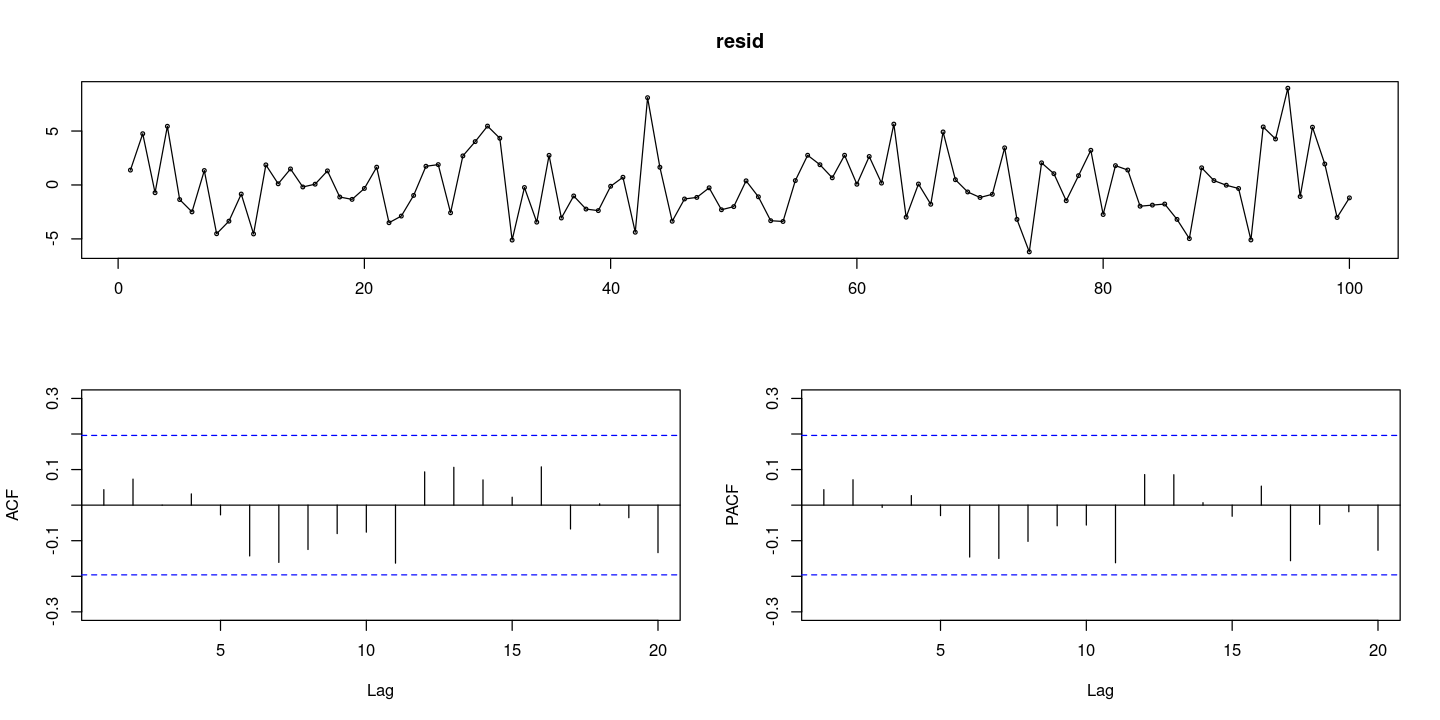

In [77]:
resid = resid(fit)
forecast::tsdisplay(resid)

In [78]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit, lags=c(6,12,18,24))

,lags,statistic,df,p-value
,6,3.147291,5,0.6772898
,12,13.135047,11,0.2845906
,18,17.072699,17,0.4494514
,24,24.393987,23,0.3822679


- H0기각 못함. 다 0이다! WN이다.

In [79]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: norma


	Jarque Bera Test

data:  resid
X-squared = 4.2649, df = 2, p-value = 0.1185


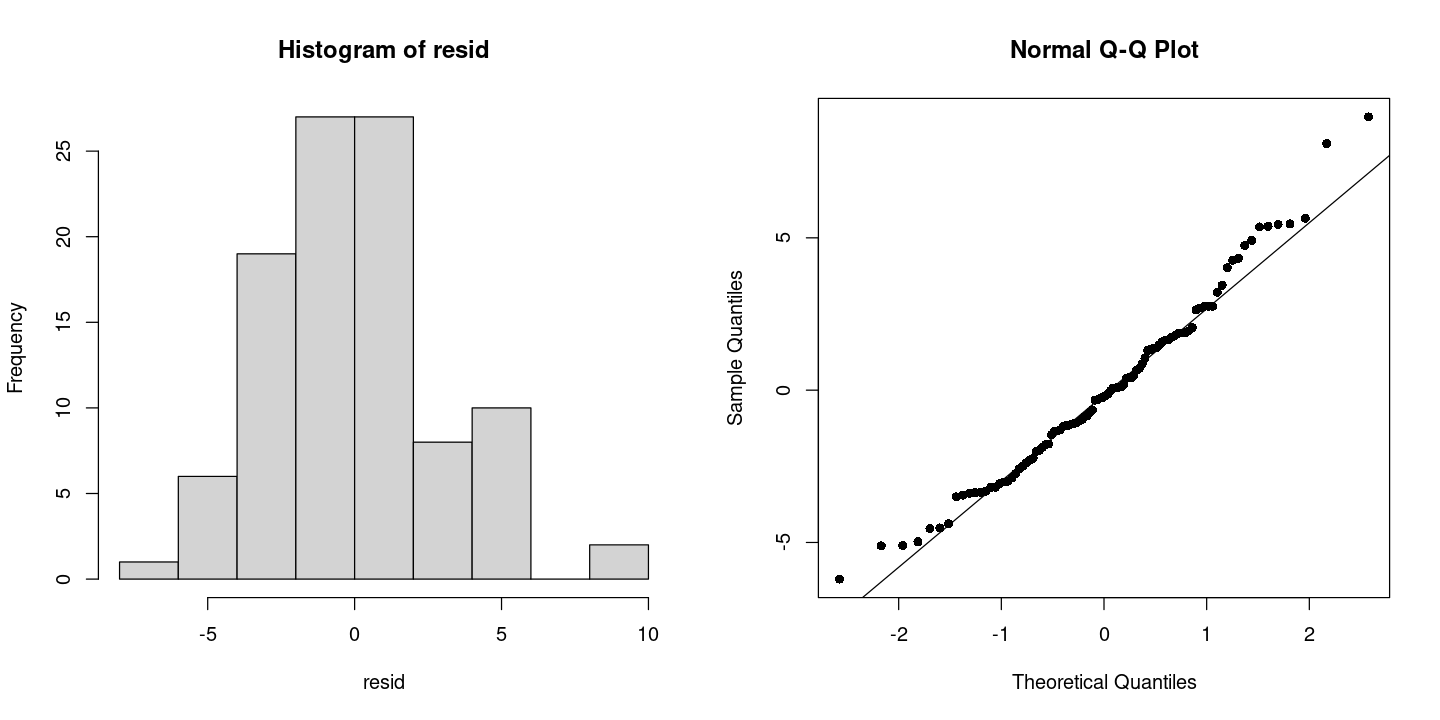

In [80]:
par(mfrow=c(1,2))
hist(resid)
qqnorm(resid, pch=16)
qqline(resid)


- 정규분포이다.

initial  value 1.394650 
iter   2 value 1.088119
iter   3 value 1.088089
iter   4 value 1.088089
iter   5 value 1.088089
iter   5 value 1.088089
iter   5 value 1.088089
final  value 1.088089 
converged
initial  value 1.087203 
iter   2 value 1.087196
iter   3 value 1.087176
iter   4 value 1.087176
iter   4 value 1.087176
iter   4 value 1.087176
final  value 1.087176 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ar1    xmean
      -0.6715  19.8312
s.e.   0.0728   0.1776

sigma^2 estimated as 8.744:  log likelihood = -250.61,  aic = 507.22

$degrees_of_freedom
[1] 98

$ttable
      Estimate     SE  t.value p.value
ar1    -0.6715 0.0728  -9.2197       0
xmean  19.8312 0.1776 111.6504       0

$AIC
[1] 5.072228

$AICc
[1] 5.073466

$BIC
[1] 5.150384


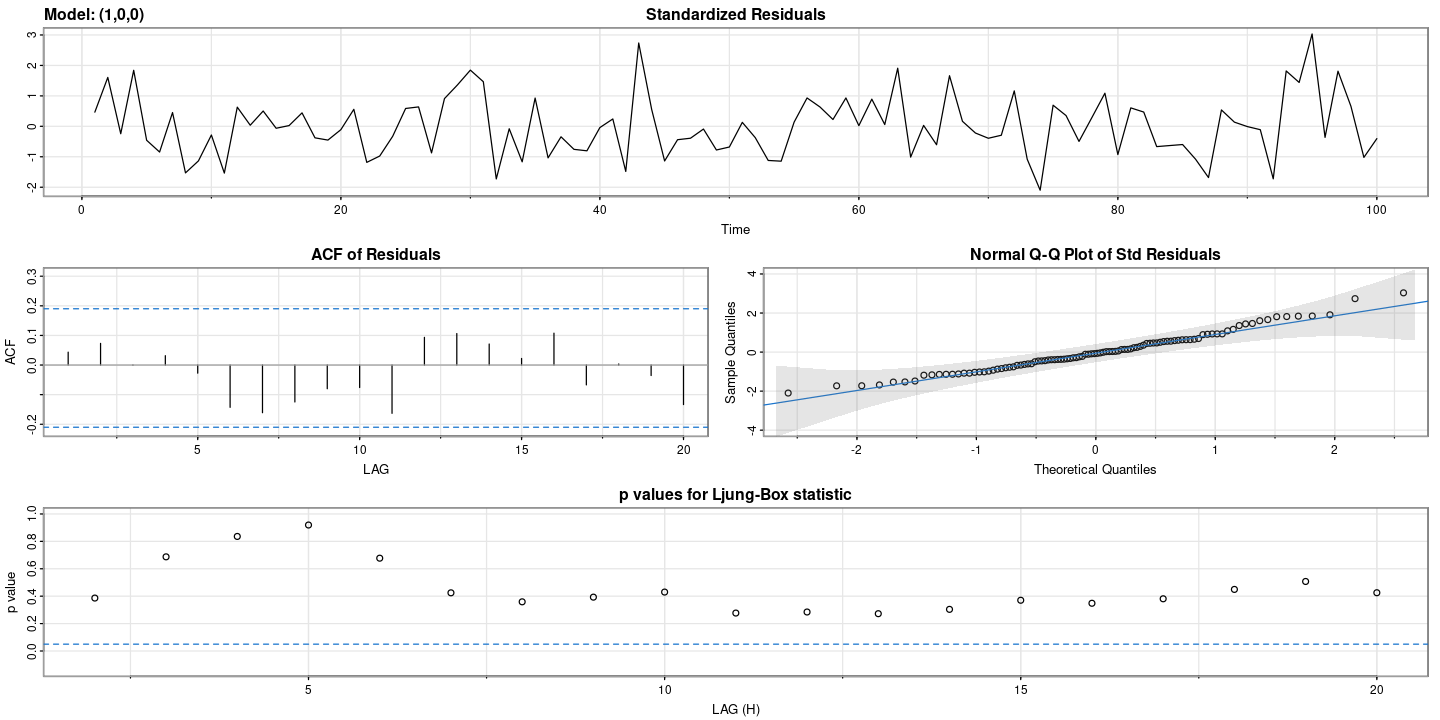

In [81]:
## 잔차 검정
astsa::sarima(z, p=1, d=0, q=0)


$pred
Time Series:
Start = 101 
End = 112 
Frequency = 1 
 [1] 20.82225 19.16558 20.27811 19.53100 20.03271 19.69579 19.92205 19.77011
 [9] 19.87214 19.80362 19.84964 19.81874

$se
Time Series:
Start = 101 
End = 112 
Frequency = 1 
 [1] 2.957007 3.561901 3.803344 3.907350 3.953359 3.973933 3.983176 3.987338
 [9] 3.989213 3.990059 3.990440 3.990612

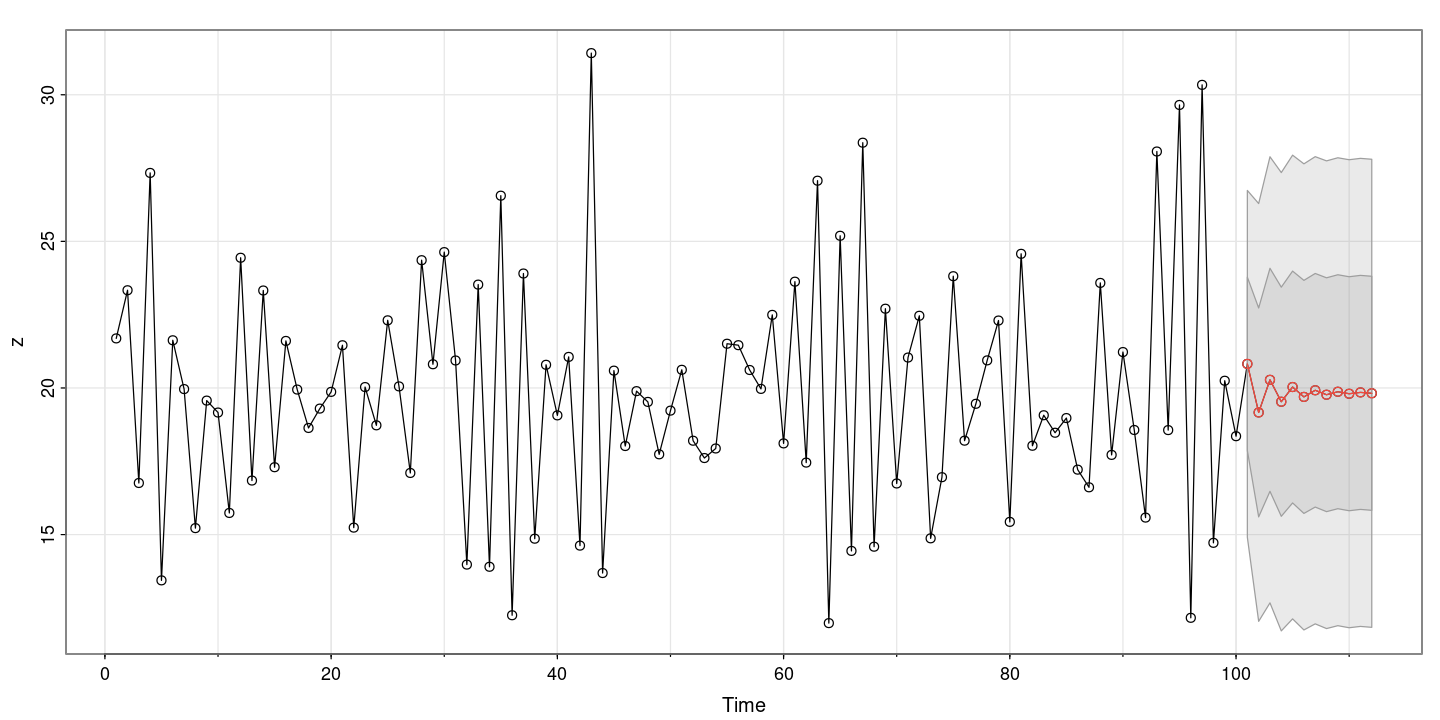

In [82]:
astsa::sarima.for(z, n.ahead=12, p=1, d=0, q=0)

`-` 과대적합 AR(2), ARMA(1,1)


In [83]:
fit1 <- arima(z,order=c(1,0,0)) #AR(1)
fit2 <- arima(z,order=c(2,0,0)) #AR(2)
fit3 <- arima(z,order=c(1,0,1)) #ARMA(1,1)

In [84]:
lmtest::coeftest(fit1)



z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ar1       -0.671544   0.072838  -9.2197 < 2.2e-16 ***
intercept 19.831150   0.177618 111.6504 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [89]:
lmtest::coeftest(fit2)


z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ar1       -0.623116   0.100156  -6.2215 4.925e-10 ***
ar2        0.070388   0.100264   0.7020    0.4827    
intercept 19.833114   0.190583 104.0657 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- ar2가 유의하지 앟네? 없어도 된다.

In [90]:

lmtest::coeftest(fit3)



z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ar1       -0.721425   0.097566  -7.3942 1.423e-13 ***
ma1        0.092687   0.139500   0.6644    0.5064    
intercept 19.832916   0.187938 105.5291 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- 얘도 추가한게 의미가 없다리

In [86]:
paste0("AIC for AR(1) = ", fit1$aic)
paste0("AIC for AR(2) = ", fit2$aic)
paste0("AIC for ARMA(1,1) = ", fit3$aic)

[1] "AIC for AR(1) = 507.222841029181"

[1] "AIC for AR(2) = 508.731382853541"

[1] "AIC for ARMA(1,1) = 508.786741594701"

In [87]:
fit1$sigma2
fit2$sigma2
fit3$sigma2

[1] 8.743891

[1] 8.700424

[1] 8.705361

- 자유도를 고려하지 않기 때문에 크게 차이는 없ㅈ만.. 선택할 필요는 없다.

In [88]:
forecast::auto.arima(z, trace = T)


 ARIMA(2,0,2) with non-zero mean : 513.4708
 ARIMA(0,0,0) with non-zero mean : 566.0505
 ARIMA(1,0,0) with non-zero mean : 507.4728
 ARIMA(0,0,1) with non-zero mean : 529.1392
 ARIMA(0,0,0) with zero mean     : 887.3166
 ARIMA(2,0,0) with non-zero mean : 509.1524
 ARIMA(1,0,1) with non-zero mean : 509.2078
 ARIMA(2,0,1) with non-zero mean : 511.2473
 ARIMA(1,0,0) with zero mean     : 686.5421

 Best model: ARIMA(1,0,0) with non-zero mean 



Series: z 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.6715  19.8312
s.e.   0.0728   0.1776

sigma^2 = 8.922:  log likelihood = -250.61
AIC=507.22   AICc=507.47   BIC=515.04

# EX 8.8 : 주가지수

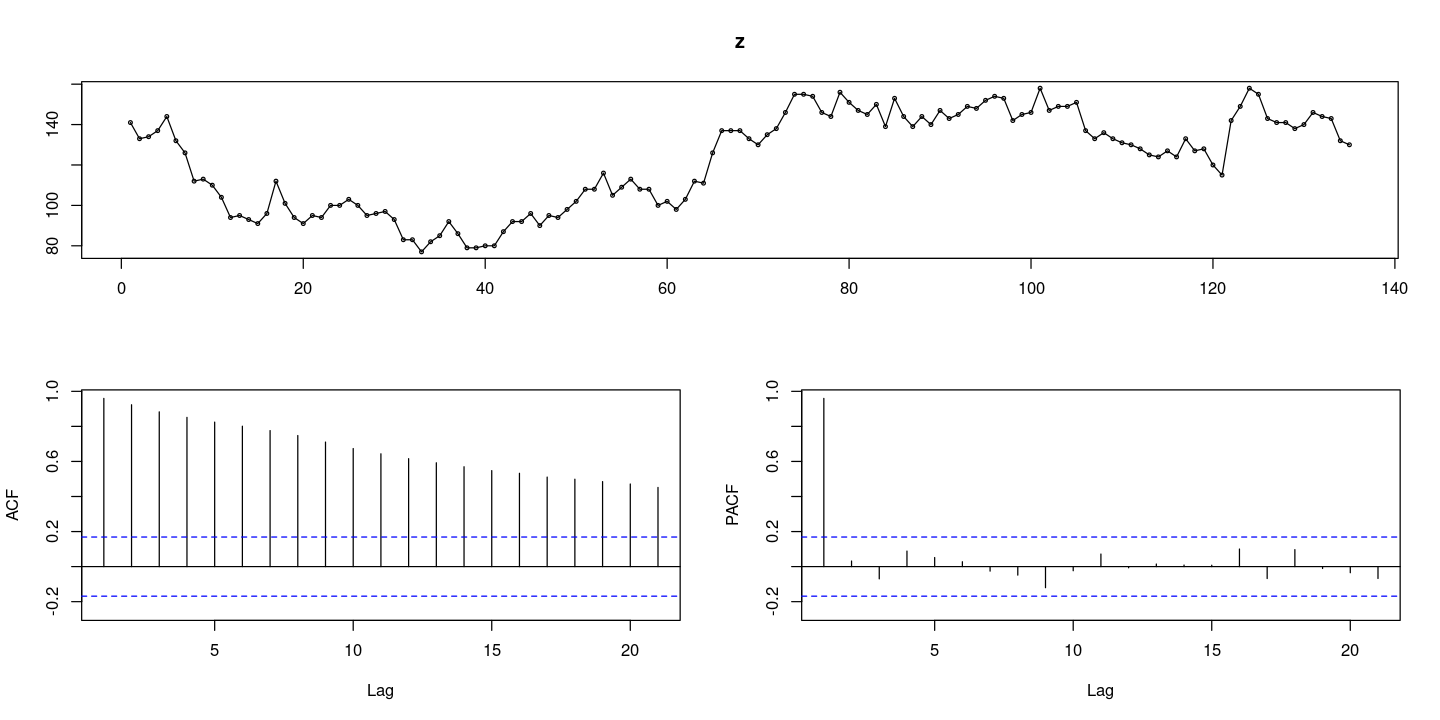

In [91]:
z <- scan("elecstock.txt")
forecast::tsdisplay(z)

- 추세는 있으나 결정적 추세가 아닌 확률적 추세가 있어 보인다..

- acf는 서서히 감소하고 pacf는 첫번째만 있는 거 보니 차분이 필요해 보이낟.

In [92]:
## 단위근 검정 H0 : 단위근이 있다.(phi=1) H1 : |phi|<1
fUnitRoots::adfTest(z, lags = 0, type = "c")
fUnitRoots::adfTest(z, lags = 1, type = "c")
fUnitRoots::adfTest(z, lags = 2, type = "c")


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -1.6769
  P VALUE:
    0.434 

Description:
 Tue Nov 28 22:59:53 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -1.5572
  P VALUE:
    0.4784 

Description:
 Tue Nov 28 22:59:53 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -1.629
  P VALUE:
    0.4517 

Description:
 Tue Nov 28 22:59:53 2023 by user: 

- 기각을 못한다!! 차분이 필요해.

- 평균이 0이 아니니까 type=c 쓰는거 주의하자.

`-` 위의 함수 외에도 단위근 검정 함수는 아래 더 있음.

In [93]:
tseries::adf.test(z)


	Augmented Dickey-Fuller Test

data:  z
Dickey-Fuller = -2.6174, Lag order = 5, p-value = 0.3197
alternative hypothesis: stationary


In [94]:
tseries::pp.test(z)


	Phillips-Perron Unit Root Test

data:  z
Dickey-Fuller Z(alpha) = -10.981, Truncation lag parameter = 4, p-value
= 0.4825
alternative hypothesis: stationary


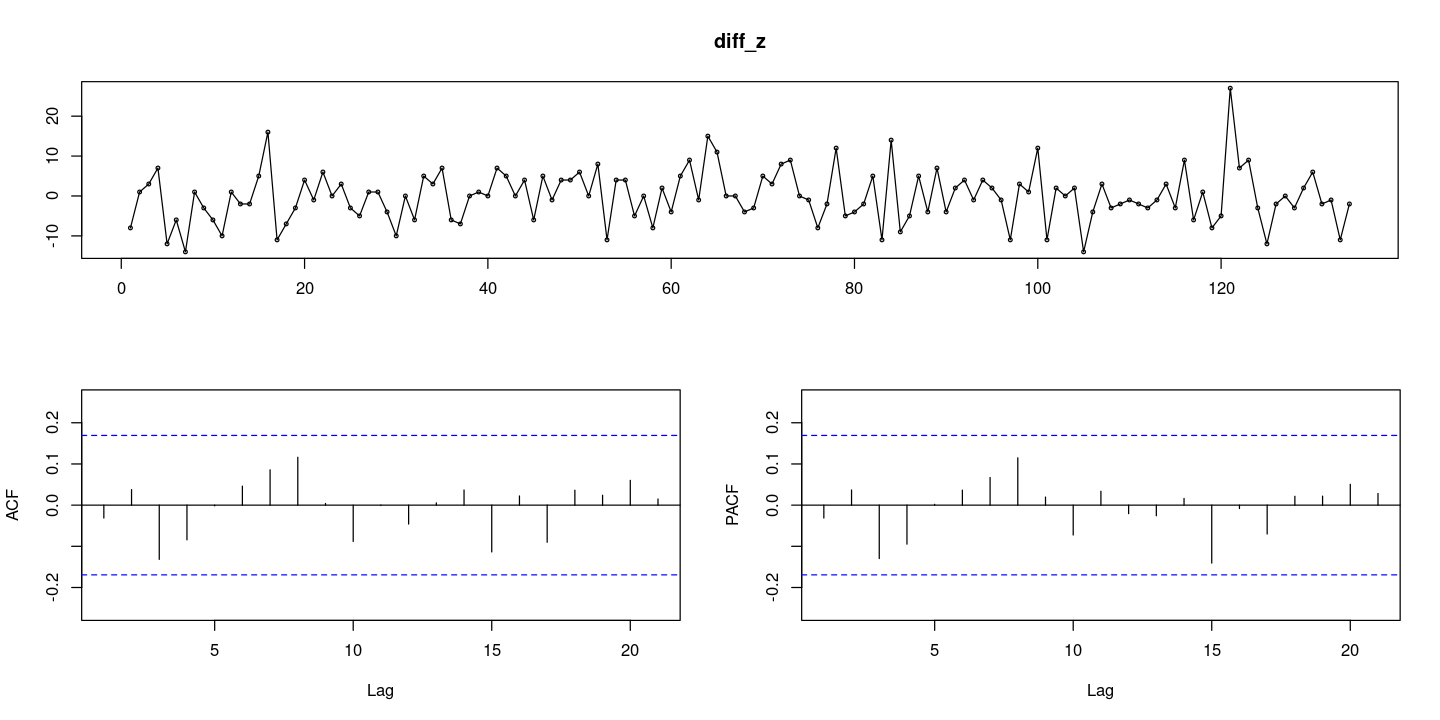

In [95]:
## 차분
diff_z = diff(z)
forecast::tsdisplay(diff_z)


- 차분을 했더니 0을 중심으로 움직이고 있다..

- acf/pacf 모든 차수에서 다 0이니까 WN이다! 엇, 그럼 랜덤워크네?

In [96]:
## 포투맨트검정 H0 : rho1=...=rho_k=0
Box.test(diff_z, lag=6, type = "Ljung-Box")
Box.test(diff_z, lag=12, type = "Ljung-Box")


	Box-Ljung test

data:  diff_z
X-squared = 4.0392, df = 6, p-value = 0.6714



	Box-Ljung test

data:  diff_z
X-squared = 8.5057, df = 12, p-value = 0.7445


- 기각을 못한다. WN이다.

In [97]:
#평균
t.test(diff_z)


	One Sample t-test

data:  diff_z
t = -0.14564, df = 133, p-value = 0.8844
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.196970  1.032791
sample estimates:
  mean of x 
-0.08208955 


- 평균이 0이라고 할 수 있다.

- $ΔZ_t ∼ WN(0, σ^2) ⇒ ΔZ_t ∼ ARIMA(0, 0, 0)$

- 따라서, $Z_t ∼ ARIMA(0, 1, 0)$

In [98]:
## 모형적합 ARIMA(0,1,0)
fit <- arima(z,order=c(0,1,0))
summary(fit)



Call:
arima(x = z, order = c(0, 1, 0))


sigma^2 estimated as 42.26:  log likelihood = -440.98,  aic = 883.95

Training set error measures:
                      ME    RMSE      MAE        MPE     MAPE      MASE
Training set -0.08043704 6.47675 4.897341 -0.2029409 4.084668 0.9928043
                    ACF1
Training set -0.03158845

In [99]:
fit$sigma2


[1] 42.26119

$\hat σ^2 = 42.261$

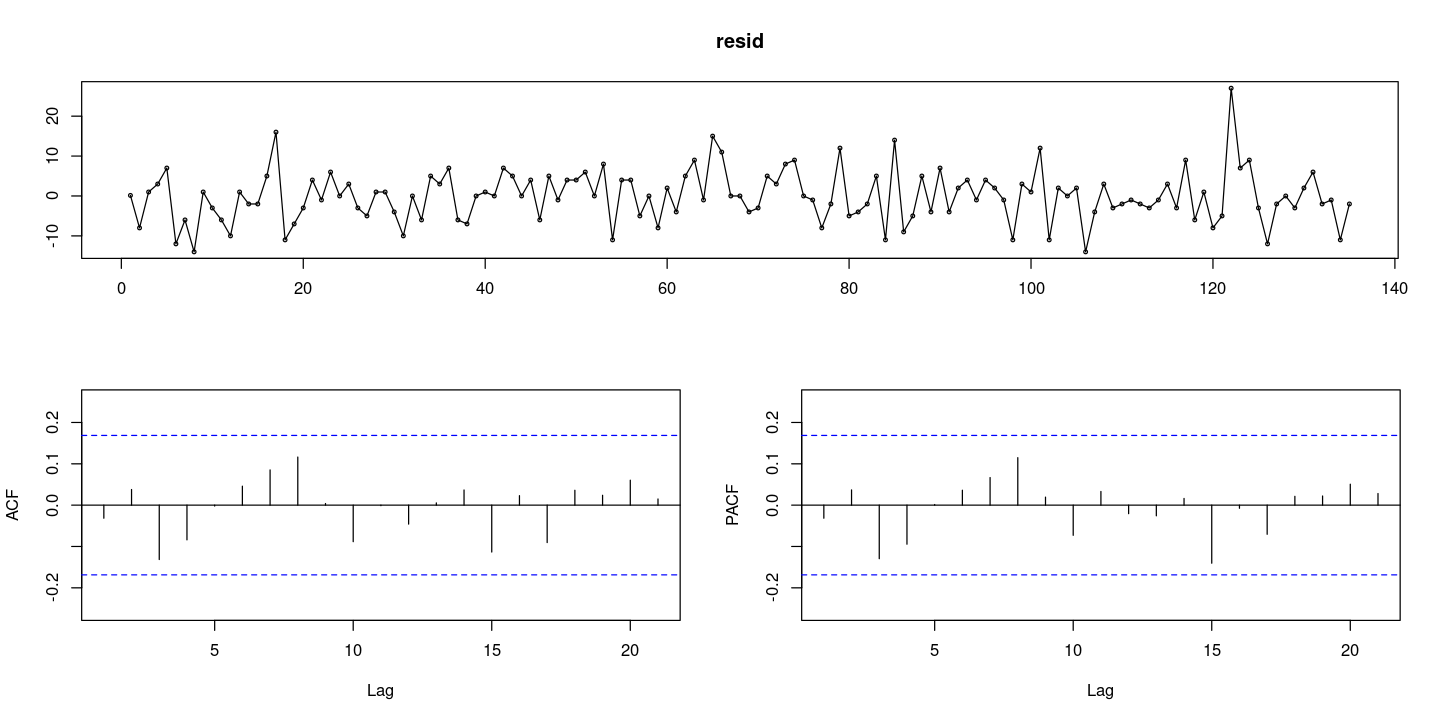

In [100]:
### 잔차검정
resid <- resid(fit)
forecast::tsdisplay(resid)

In [101]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: normal


	Jarque Bera Test

data:  resid
X-squared = 19.063, df = 2, p-value = 7.254e-05


- 유의확률이 작게 나와서 정규분포라 하기는 어렵다.. (이상점 떄문에 꼬리)

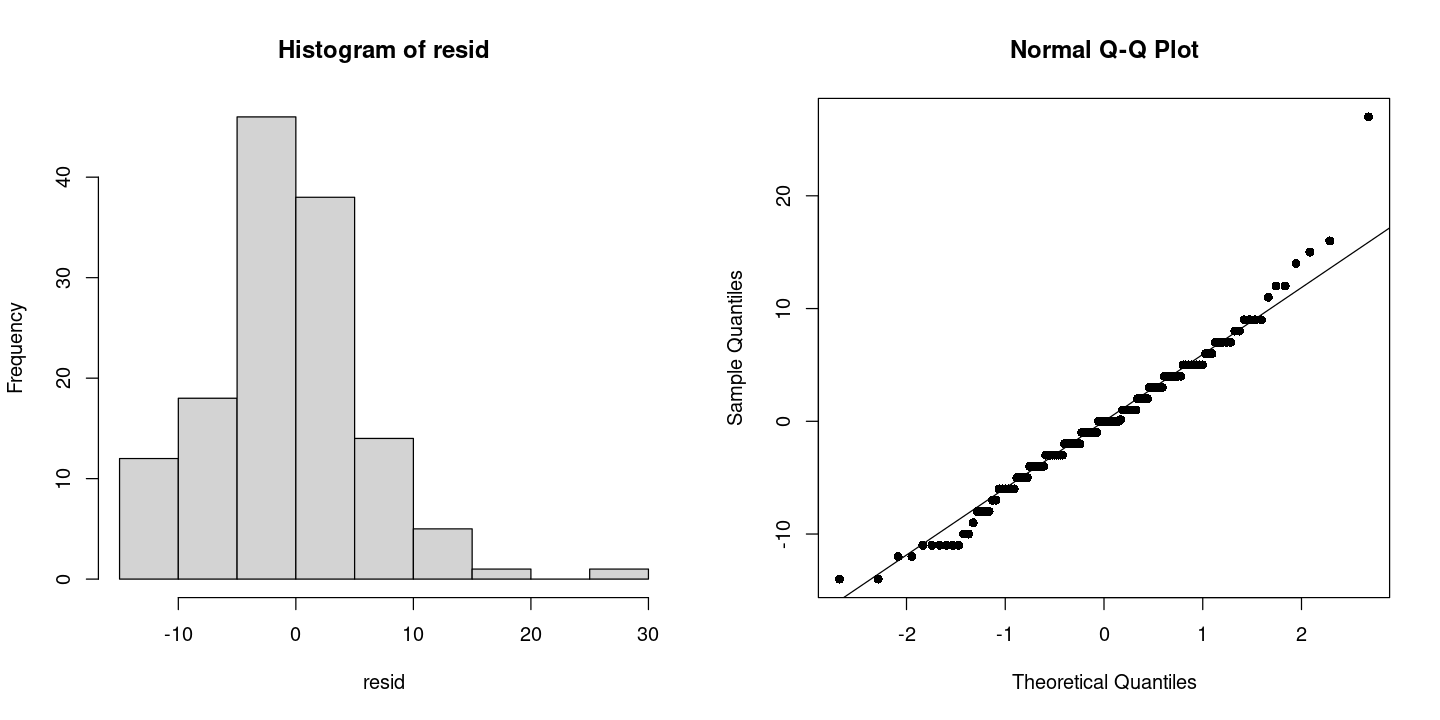

In [102]:
par(mfrow=c(1,2))
hist(resid)
qqnorm(resid, pch=16)
qqline(resid)


In [103]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit, lags=c(6,12,18,24))

,lags,statistic,df,p-value
,6,4.057476,6,0.6688985
,12,8.548020,12,0.7409734
,18,12.308859,18,0.8308883
,24,17.491184,24,0.8269712


- 다 유의하지 않다. 따라서 WN이다.

initial  value 1.871855 
iter   1 value 1.871855
final  value 1.871855 
converged
initial  value 1.871855 
iter   1 value 1.871855
final  value 1.871855 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
      constant
       -0.0821
s.e.    0.5615

sigma^2 estimated as 42.25:  log likelihood = -440.97,  aic = 885.93

$degrees_of_freedom
[1] 133

$ttable
         Estimate     SE t.value p.value
constant  -0.0821 0.5615 -0.1462   0.884

$AIC
[1] 6.611438

$AICc
[1] 6.611664

$BIC
[1] 6.654689


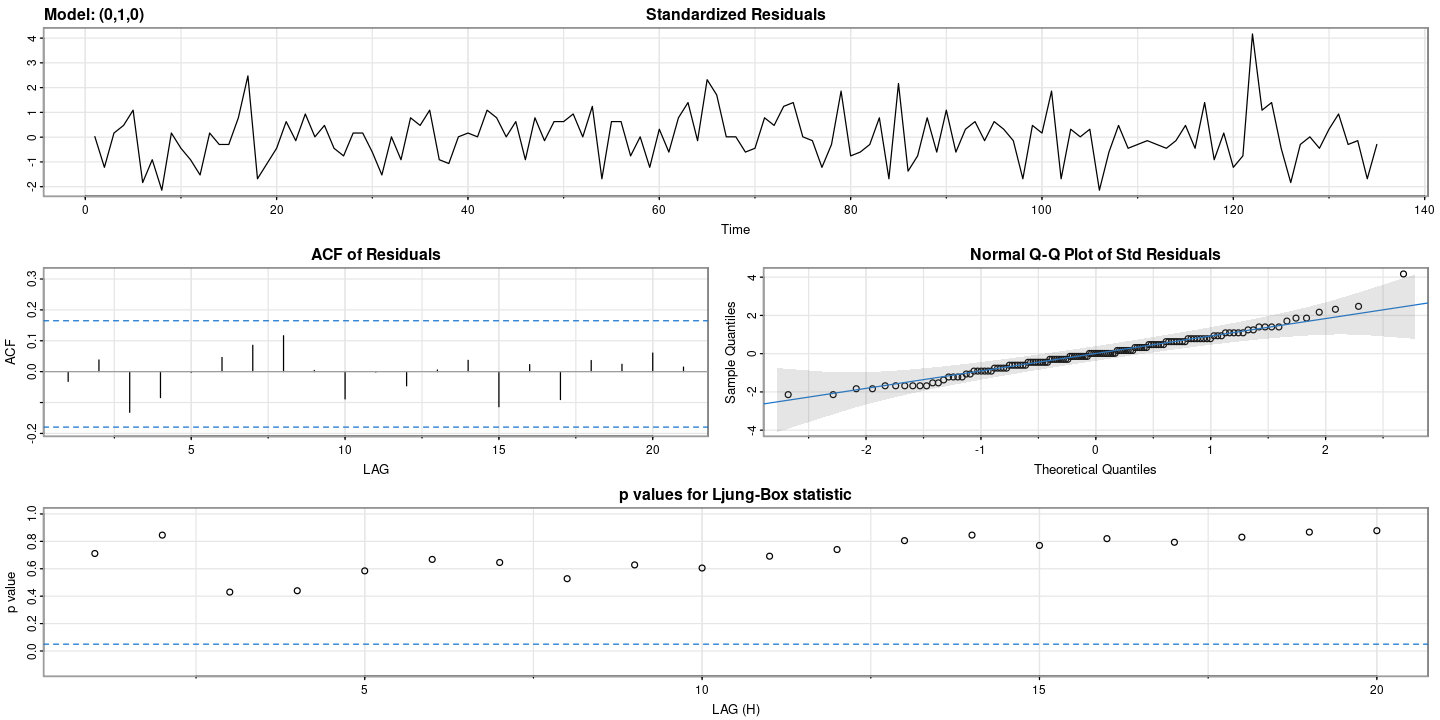

In [104]:
## 잔차 검정
astsa::sarima(z, p=0, d=1, q=0)

$pred
Time Series:
Start = 136 
End = 147 
Frequency = 1 
 [1] 129.9179 129.8358 129.7537 129.6716 129.5896 129.5075 129.4254 129.3433
 [9] 129.2612 129.1791 129.0970 129.0149

$se
Time Series:
Start = 136 
End = 147 
Frequency = 1 
 [1]  6.500343  9.192873 11.258924 13.000685 14.535208 15.922523 17.198290
 [8] 18.385746 19.501028 20.555889 21.559198 22.517848

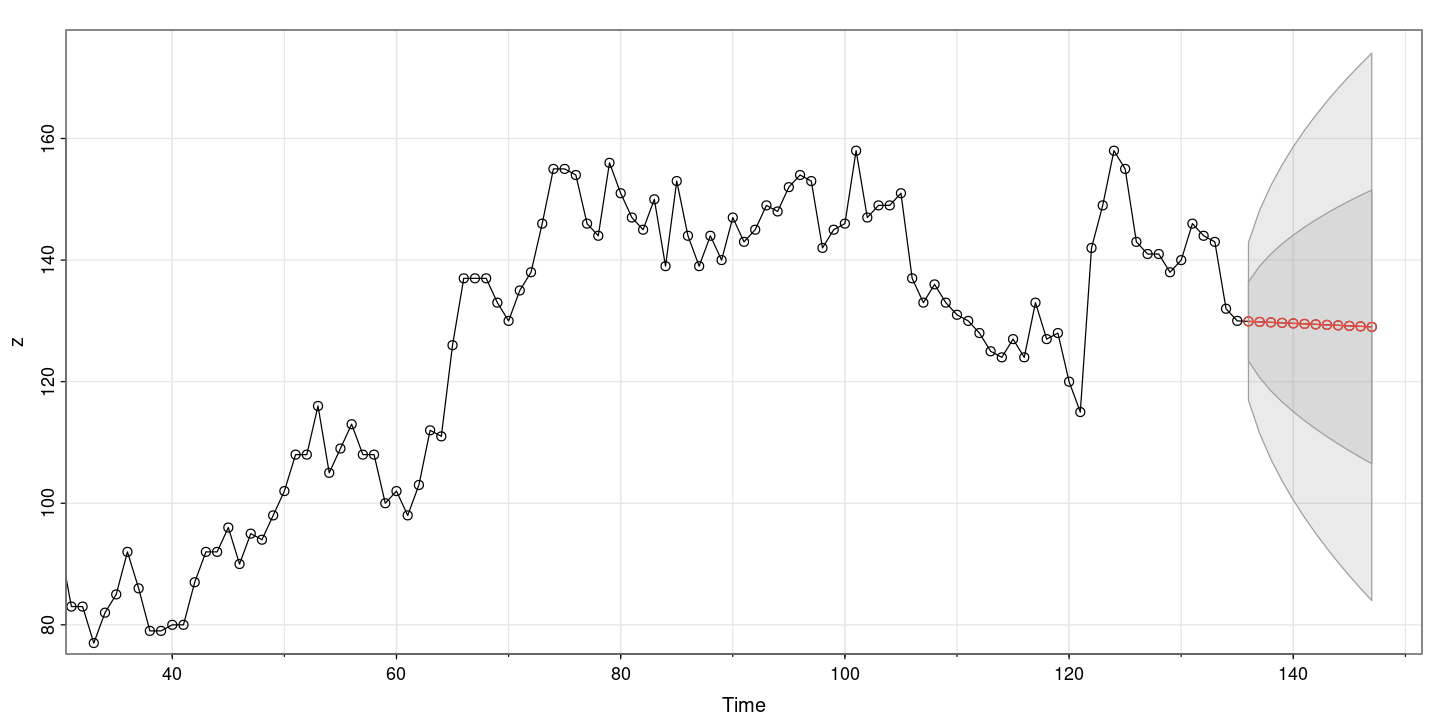

In [105]:
astsa::sarima.for(z, n.ahead=12, p=0, d=1, q=0)


# EX 8.9 : 여성근로자수

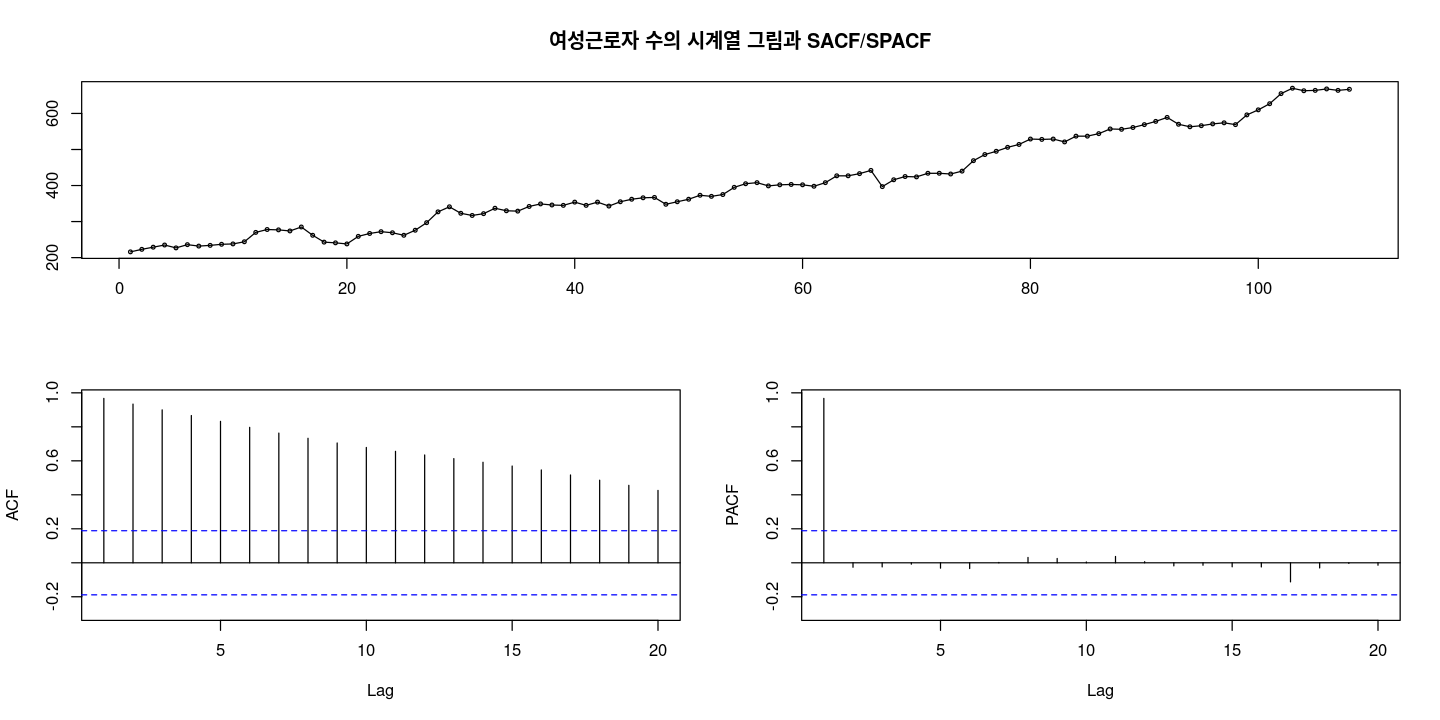

In [106]:
z <- scan("female.txt")
forecast::tsdisplay(z, main = "여성근로자 수의 시계열 그림과 SACF/SPACF")


- 결정적 추세가 있어 보인다! 

- ACF: 천천히 감소.. ---> 차분이 필요해!

- PACF:처음만 살아있다. 


In [107]:
## 단위근 검정 H0 : 단위근이 있다.
fUnitRoots::adfTest(z, lags = 0, type = "ct")
fUnitRoots::adfTest(z, lags = 1, type = "ct")
fUnitRoots::adfTest(z, lags = 2, type = "ct")



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -2.1323
  P VALUE:
    0.5217 

Description:
 Tue Nov 28 23:05:01 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -2.4926
  P VALUE:
    0.3723 

Description:
 Tue Nov 28 23:05:01 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.3453
  P VALUE:
    0.4334 

Description:
 Tue Nov 28 23:05:01 2023 by user: 

- 차분이 필요하다.

In [108]:
tseries::adf.test(z) # ADF 검정



	Augmented Dickey-Fuller Test

data:  z
Dickey-Fuller = -1.9012, Lag order = 4, p-value = 0.6176
alternative hypothesis: stationary


In [109]:
tseries::pp.test(z) # PP 검정


	Phillips-Perron Unit Root Test

data:  z
Dickey-Fuller Z(alpha) = -10.735, Truncation lag parameter = 4, p-value
= 0.494
alternative hypothesis: stationary


## 분해법

In [110]:
################################
## 회귀모형
t <- 1:length(z)
fit1 <- lm(z~t)
summary(fit1)
## hat Tt = 186.35 + 4.07t
## Zt = Tt + It = b0 + b1t + et


Call:
lm(formula = z ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.372 -17.080   0.326  16.135  63.929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 186.34978    5.00807   37.21   <2e-16 ***
t             4.07496    0.07976   51.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.84 on 106 degrees of freedom
Multiple R-squared:  0.961,	Adjusted R-squared:  0.9606 
F-statistic:  2610 on 1 and 106 DF,  p-value: < 2.2e-16


- 모형이 다 유의하다

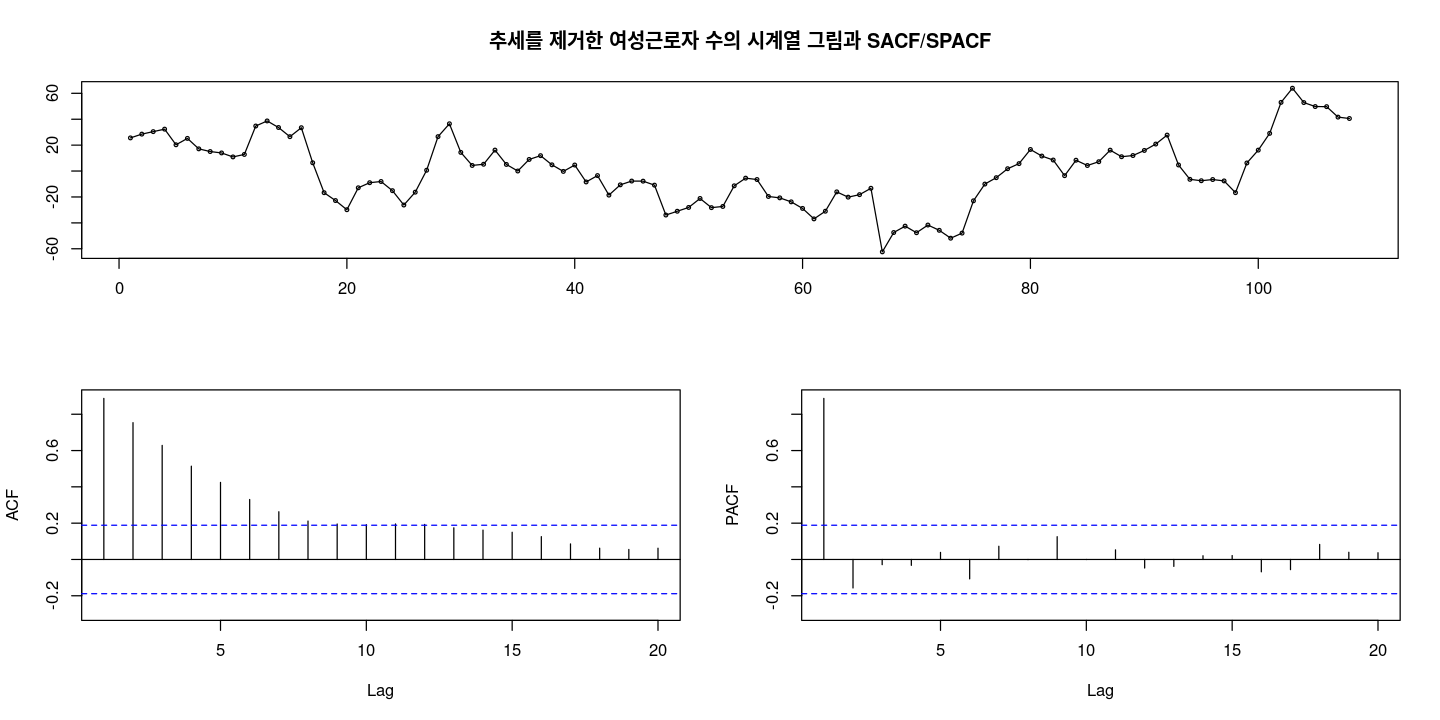

In [114]:
et <- z - fitted(fit1) #추세 제거
forecast::tsdisplay(et, main = "추세를 제거한 여성근로자 수의 시계열 그림과 SACF/SPACF")

- 0을 중심으로 대칭인것처럼 보이지만.. 확률적 추세가 있어 보이기도 한다..

In [115]:
##H0 : rho1 = ... = rho6 = 0
Box.test(et, lag=6, type = "Ljung-Box")
##H0 : rho1 = ... = rho12 = 0
Box.test(et, lag=12, type = "Ljung-Box")



	Box-Ljung test

data:  et
X-squared = 259.33, df = 6, p-value < 2.2e-16



	Box-Ljung test

data:  et
X-squared = 291.08, df = 12, p-value < 2.2e-16


- pvalur가 작으니까 오차항이 WN은 아니다.

In [116]:
#H0 : phi=1
fUnitRoots::adfTest(et, lags = 0, type = "nc")
fUnitRoots::adfTest(et, lags = 1, type = "nc")
fUnitRoots::adfTest(et, lags = 2, type = "nc")


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -2.1707
  P VALUE:
    0.03095 

Description:
 Tue Nov 28 23:08:43 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -2.5412
  P VALUE:
    0.01241 

Description:
 Tue Nov 28 23:08:43 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.4091
  P VALUE:
    0.01793 

Description:
 Tue Nov 28 23:08:43 2023 by user: 

- H0기각할 수 있다. 차분이 필요하지 않다.

`-` $e_t ∼ AR(1)$

In [117]:
t.test(et)



	One Sample t-test

data:  et
t = -1.8089e-15, df = 107, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -4.906433  4.906433
sample estimates:
    mean of x 
-4.477064e-15 


In [140]:
###### lm (1차추세 모형)
###### et ~ AR(1)
fit_et <- arima(et, order=c(1,0,0),
                 include.mean = F) ## et
summary(fit_et)


Call:
arima(x = et, order = c(1, 0, 0), include.mean = F)

Coefficients:
         ar1
      0.9077
s.e.  0.0402

sigma^2 estimated as 122.3:  log likelihood = -413.68,  aic = 831.37

Training set error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set 0.2034053 11.06091 8.125101 -113.0911 259.426 0.9717878 0.1427947

- 파이:0.9077 <- 절대값이 1보다 작으므로 정상 시계열이라고 생각할 수 있다.

- 1에 가까운 값이니까. 파이^K으로 감소하니까.. 천천히 감소하는 것처럼 보임(acf그래프에서)

In [119]:
lmtest::coeftest(fit_et)


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 0.907703   0.040184  22.588 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- 유의확률이 작게 나와서 정규분포라 하기는 어렵다.. (이상점 떄문에 꼬리)

`-` 결정적 추세를 분해법을 사용하여 제거한 후 불규칙 성분에 대해 모형 적합 결과

$Z_t = β_0 + β_1 ∗ t + e_t : \hat Z_t = 186.35 + 4.07t$

$e_t = ϕe_{t−1} + u_t, e_t ∼ AR(1) (μ = 0, \hat ϕ = 0.91)$

$u_t ∼ WN(0, σ^2)$

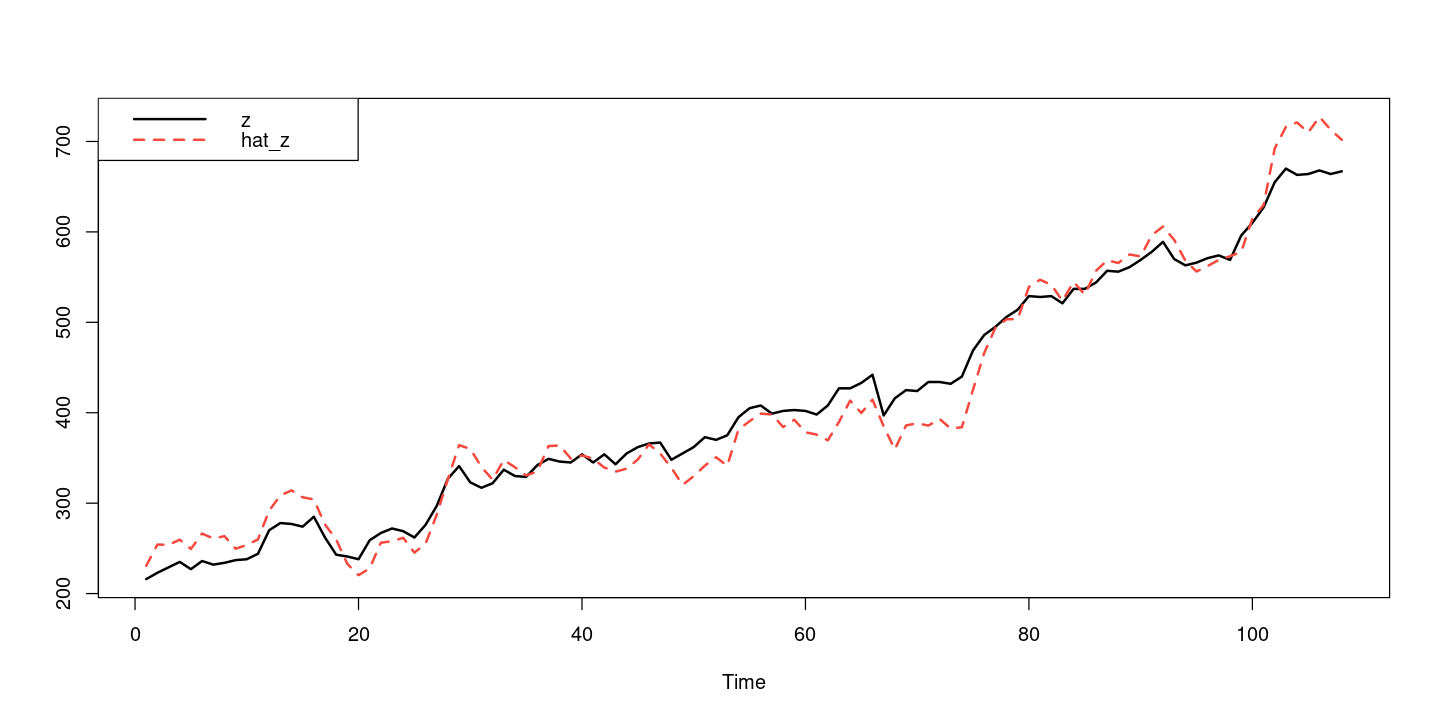

In [120]:
#hat_zt = hat_Tt + hat_et
hat_zt = fitted(fit) + fitted(fit_et)
ts.plot(z, hat_zt, col=1:2, lty=1:2, lwd=2)
legend("topleft", c("z","hat_z"), col=1:2, lty=1:2, lwd=2)

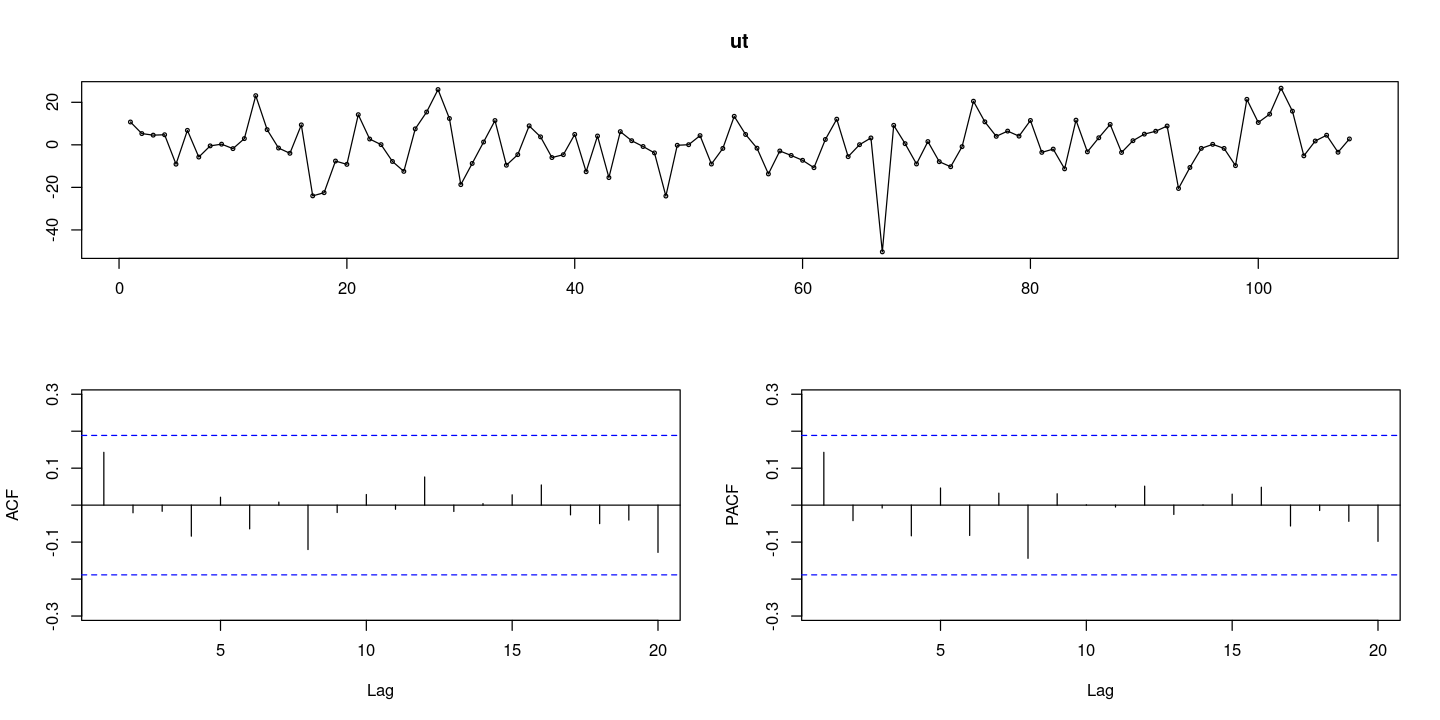

In [121]:
#### ut에 대한 잔차검정
ut <- resid(fit_et)
forecast::tsdisplay(ut)

- wn이다

In [122]:
## 정규성검정
tseries::jarque.bera.test(ut) ##JB test H0: normal



	Jarque Bera Test

data:  ut
X-squared = 56.855, df = 2, p-value = 4.509e-13


- 정규분포 아니다. (오차 작은거 하나 있어서)

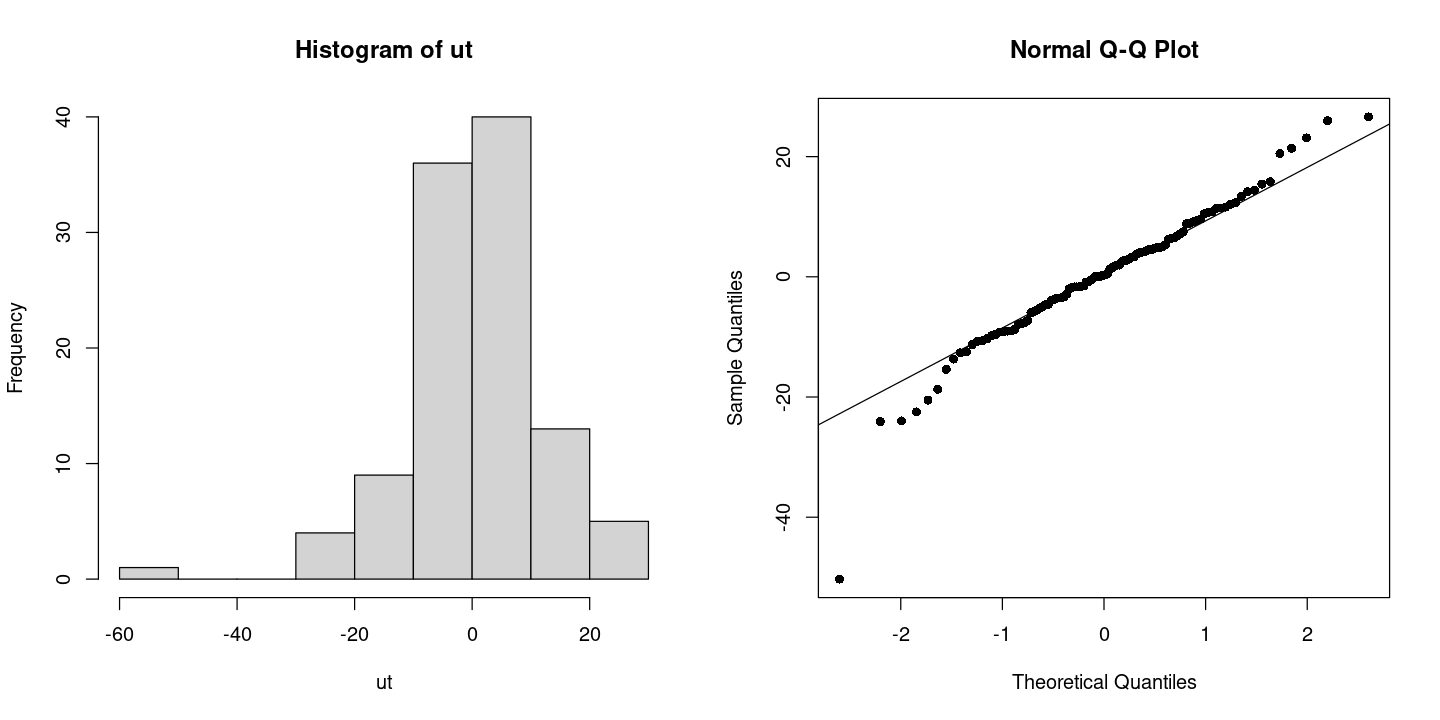

In [123]:
par(mfrow=c(1,2))
hist(ut)
qqnorm(ut, pch=16)
qqline(ut)


In [124]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit_et, lags=c(6,12,18,24))


,lags,statistic,df,p-value
,6,3.677312,5,0.5967438
,12,6.277097,11,0.8542505
,18,7.217262,17,0.9805570
,24,13.987201,23,0.9272372


- 모든 차수에서 rho=0이다. WN이다.

initial  value 3.242671 
iter   2 value 2.404146
iter   3 value 2.403718
iter   4 value 2.403704
iter   5 value 2.403697
iter   6 value 2.403671
iter   7 value 2.403663
iter   8 value 2.403662
iter   9 value 2.403646
iter  10 value 2.403646
iter  10 value 2.403646
iter  10 value 2.403646
final  value 2.403646 
converged
initial  value 2.411035 
iter   2 value 2.410970
iter   3 value 2.410428
iter   4 value 2.410411
iter   5 value 2.410401
iter   6 value 2.410390
iter   7 value 2.410390
iter   8 value 2.410389
iter   8 value 2.410389
iter   8 value 2.410389
final  value 2.410389 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1    xmean
      0.9078   5.0964
s.e.  0.0400  10.8053

sigma^2 estimated as 122.1:  log likelihood = -413.57,  aic = 833.13

$degrees_of_freedom
[1] 106

$ttable
      Estimate      SE t.value p.value
ar1     0.9078  0.0400 22.6947  0.0000
xmean   5.0964 10.8053  0.4717  0.6381

$AIC
[1] 7.714211

$AICc
[1] 7.71527

$BIC
[1] 7.788715


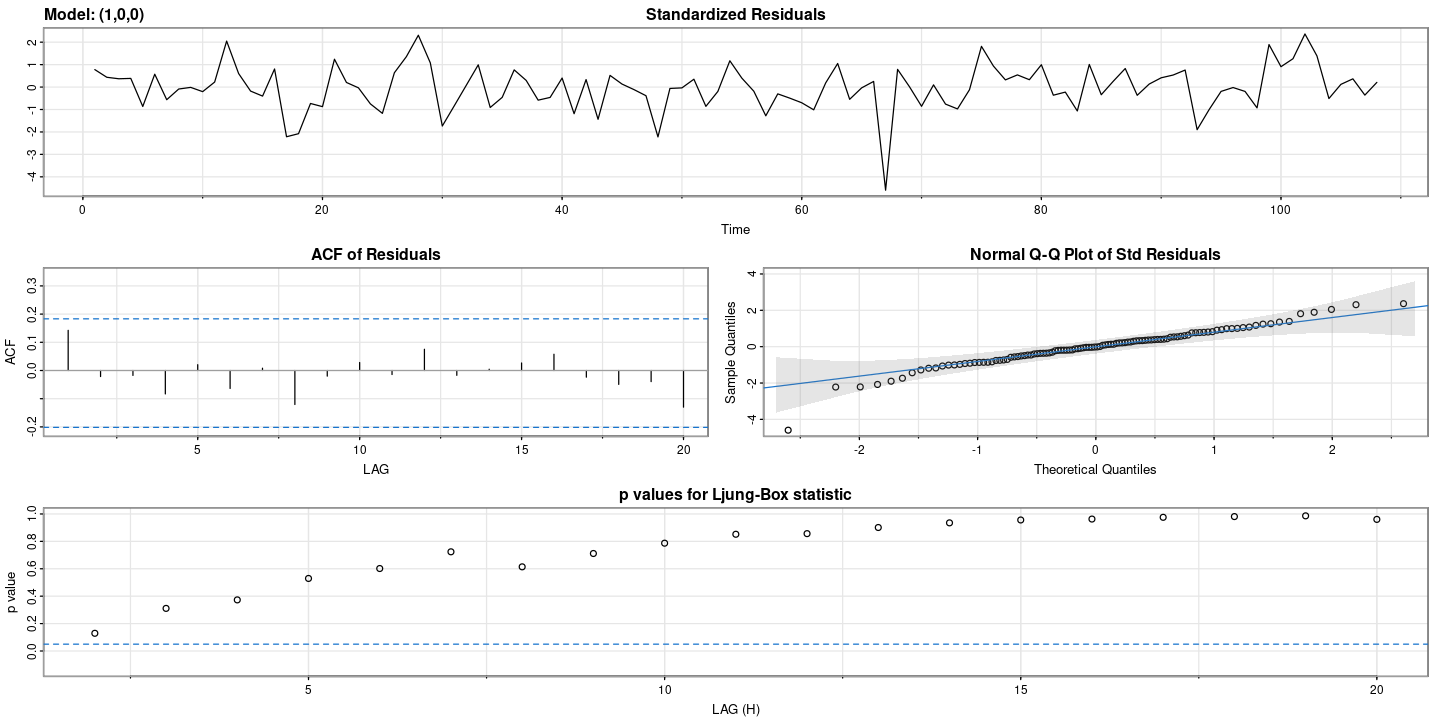

In [125]:
## 잔차 검정
astsa::sarima(et, p=1, d=0, q=0)

## 결정적 추세가 아니라 확률적 추세라고 생각하고 차분을 진행하여 추세 성분 제거한 후 적합하기

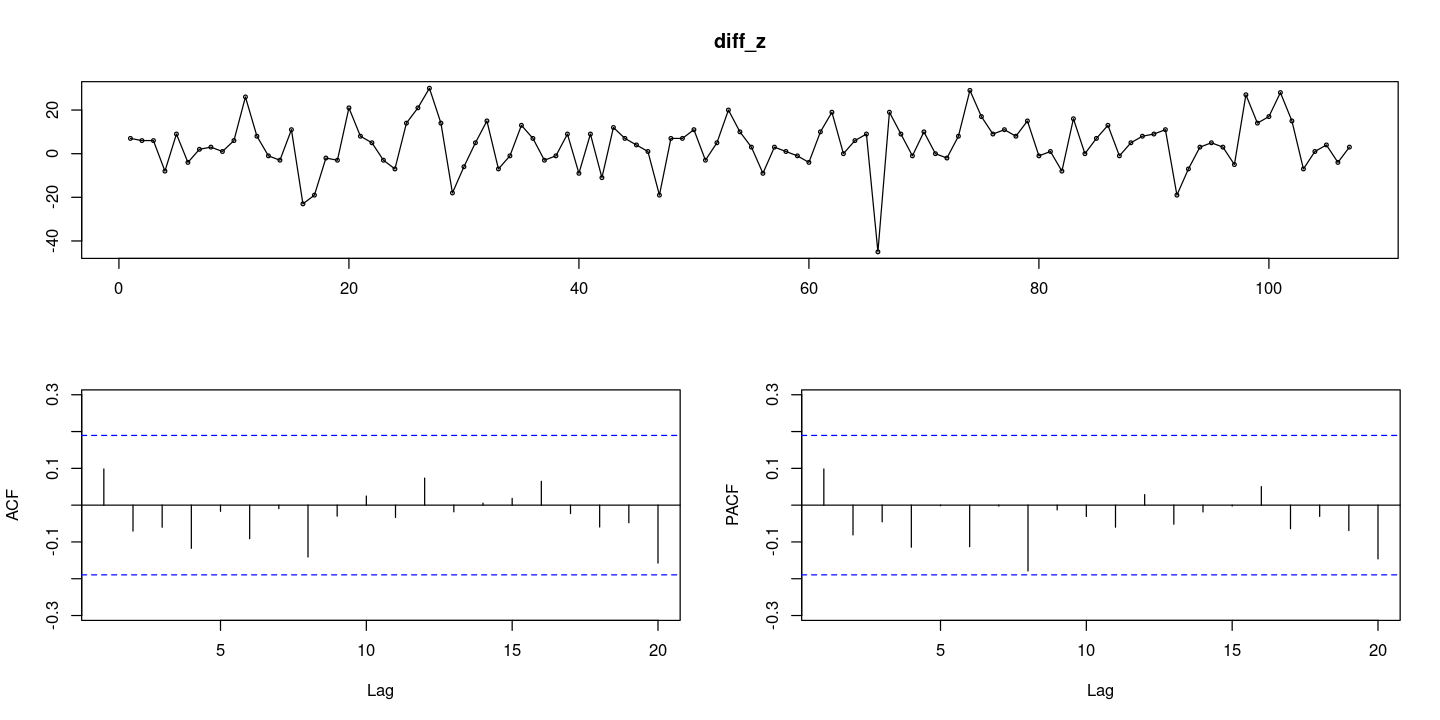

In [128]:
## 차분
diff_z = diff(z)
forecast::tsdisplay(diff_z)

- 차분한 데이터가 WN이다.

In [129]:
Box.test(diff(z), lag=6, type = "Ljung-Box")
Box.test(diff(z), lag=12, type = "Ljung-Box")


	Box-Ljung test

data:  diff(z)
X-squared = 4.5688, df = 6, p-value = 0.6002



	Box-Ljung test

data:  diff(z)
X-squared = 7.895, df = 12, p-value = 0.7933


In [130]:
t.test(diff(z))



	One Sample t-test

data:  diff(z)
t = 3.8382, df = 106, p-value = 0.0002111
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.037736 6.392171
sample estimates:
mean of x 
 4.214953 


- 0은 좀 아닌거 같다..?

In [131]:
# Zt ~ radomwalk, ARIMA(0,1,0) with drift
## 모형 ARIMA(0,1,0)
fit <- arima(z,order=c(0,1,0))
summary(fit)



Call:
arima(x = z, order = c(0, 1, 0))


sigma^2 estimated as 145.6:  log likelihood = -418.3,  aic = 838.6

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 4.177926 12.01043 9.085333 0.990671 2.414276 0.9909589 0.09736789

$Z_t = Z_{t−1} + ε_t$: random walk

$Z_t = δ + Z_{t−1} + ε_t$: random walk with drift

$(1 − B)Z_t = δ + ϵ_t$ : 모형에 차분한 데이터를 넣어줌.


In [141]:
fit2 <- arima(diff_z, order=c(0,0,0))   #알아서 mean을 적합해줌
summary(fit2)


Call:
arima(x = diff_z, order = c(0, 0, 0))

Coefficients:
      intercept
          4.215
s.e.      1.093

sigma^2 estimated as 127.8:  log likelihood = -411.34,  aic = 826.68

Training set error measures:
                       ME     RMSE      MAE  MPE MAPE      MASE       ACF1
Training set 2.091723e-15 11.30629 8.354441 -Inf  Inf 0.7330884 0.09829173

`-` 차분을 이용하여 적합한 최종 모형

$Z_t = δ + Z_{t−1} + ε_t$: random walk with drift

$ε_t ∼ WN(0, σ^2)$

$\hat δ = 4.215, \hat σ^2 = 127.8$


- AIC가 더 작아졌다. drift가 있는 모형이 더 좋다

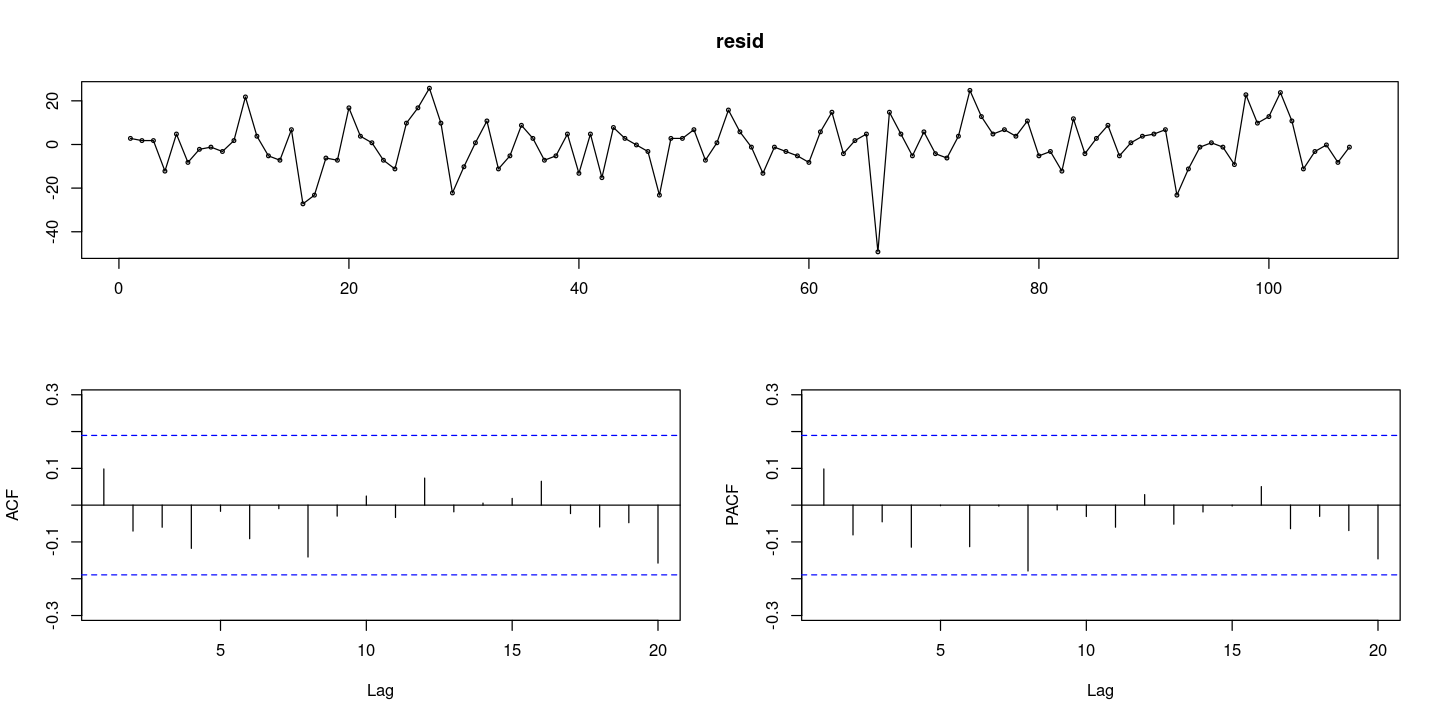

In [134]:
### 잔차검정
resid = resid(fit2)
forecast::tsdisplay(resid)


In [135]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: normal


	Jarque Bera Test

data:  resid
X-squared = 40.633, df = 2, p-value = 1.502e-09


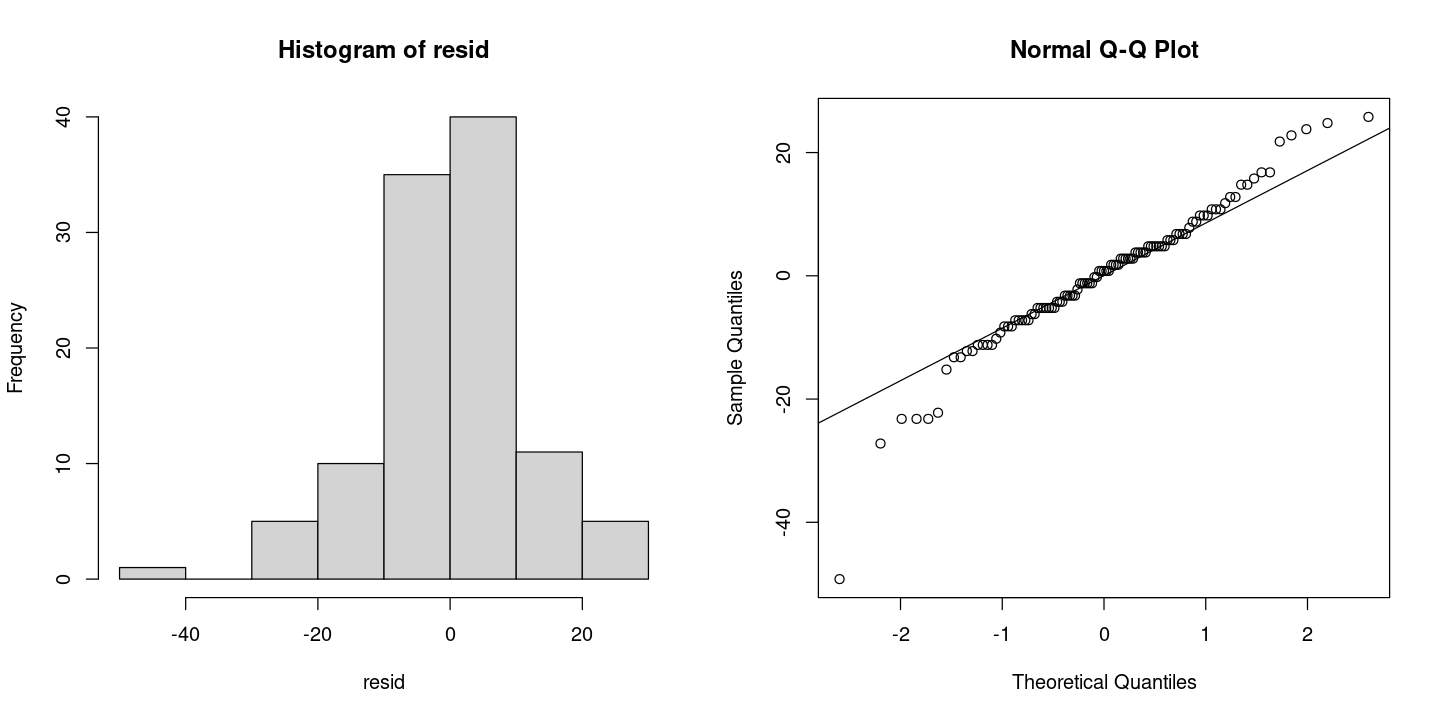

In [136]:
par(mfrow=c(1,2))
hist(resid)
qqnorm(resid)
qqline(resid)

In [137]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit_et, lags=c(6,12,18,24))

,lags,statistic,df,p-value
,6,3.677312,5,0.5967438
,12,6.277097,11,0.8542505
,18,7.217262,17,0.9805570
,24,13.987201,23,0.9272372


initial  value 2.425360 
iter   1 value 2.425360
final  value 2.425360 
converged
initial  value 2.425360 
iter   1 value 2.425360
final  value 2.425360 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
      constant
         4.215
s.e.     1.093

sigma^2 estimated as 127.8:  log likelihood = -411.34,  aic = 826.68

$degrees_of_freedom
[1] 106

$ttable
         Estimate    SE t.value p.value
constant    4.215 1.093  3.8562   2e-04

$AIC
[1] 7.725979

$AICc
[1] 7.726336

$BIC
[1] 7.775939


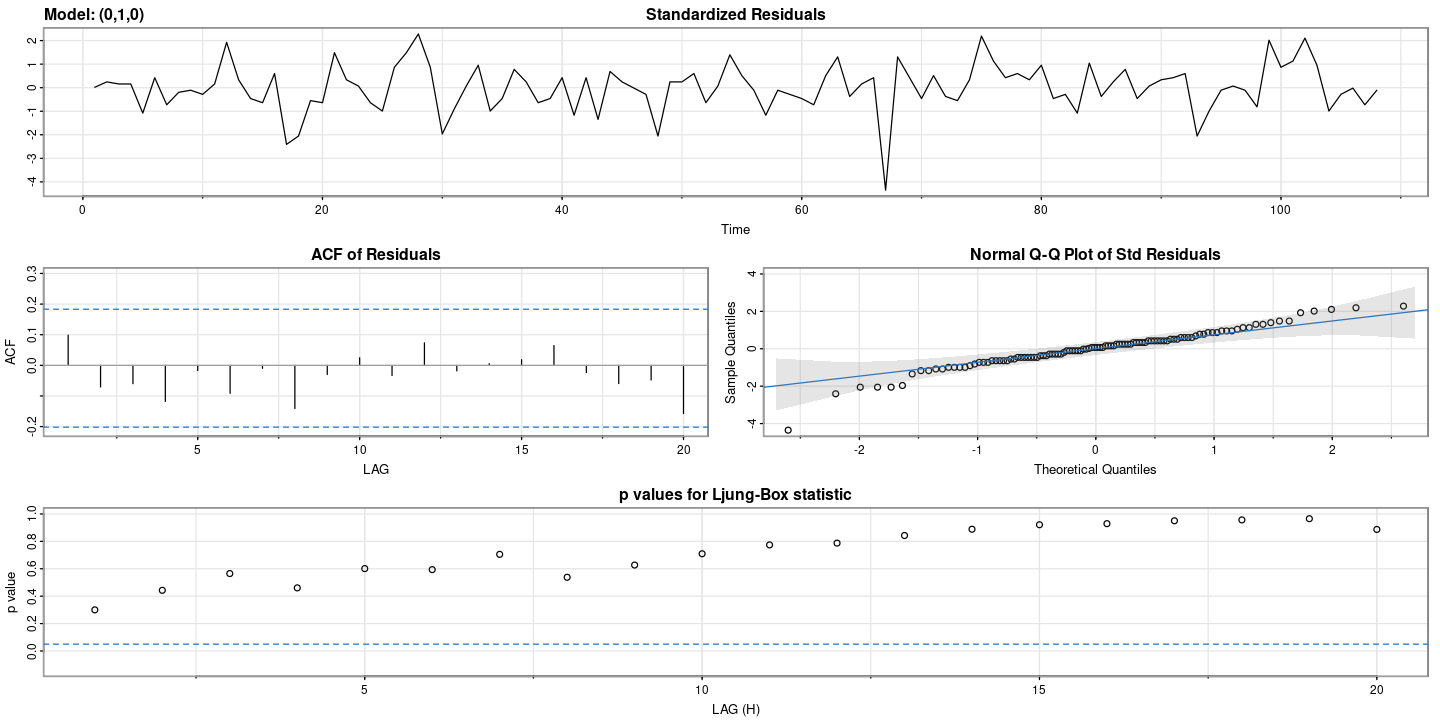

In [138]:
## 잔차 검정
astsa::sarima(z, p=0, d=1, q=0)

$pred
Time Series:
Start = 109 
End = 120 
Frequency = 1 
 [1] 671.2150 675.4299 679.6449 683.8598 688.0748 692.2897 696.5047 700.7196
 [9] 704.9346 709.1495 713.3645 717.5794

$se
Time Series:
Start = 109 
End = 120 
Frequency = 1 
 [1] 11.30629 15.98952 19.58308 22.61259 25.28164 27.69465 29.91364 31.97903
 [9] 33.91888 35.75364 37.49874 39.16615

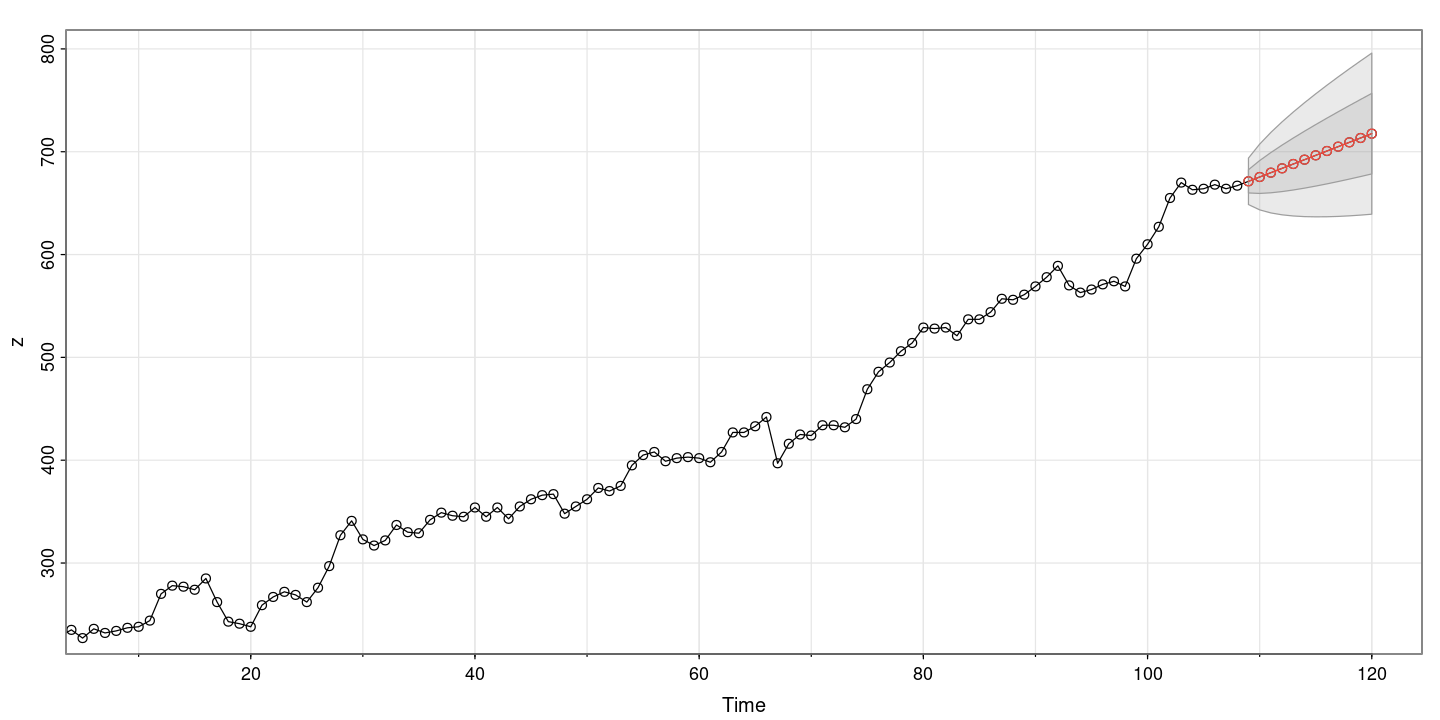

In [139]:
astsa::sarima.for(z, n.ahead=12, p=0, d=1, q=0)